In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('usa_acc.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.shape

(7728394, 46)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
#çok fazla kategorik var
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

End_Lng                  44.029355
End_Lat                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Astronomical_Twilight     0.300787
Nautical_Twilight         0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
ID                        0.000000
Distance(mi)              0.000000
Start_Lng                 0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time            

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [7]:
#zaman analizi yapabilmek için çevirmek zorundayız
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df.dropna(subset=['Start_Time'], inplace=True) # Hatalı tarih varsa o satırı sil

df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month

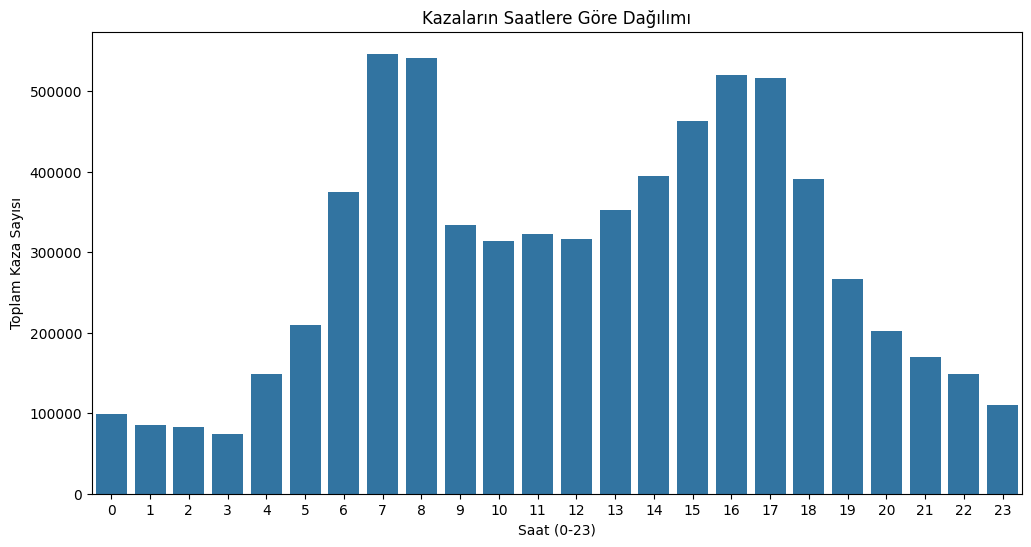

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df)
plt.title('Kazaların Saatlere Göre Dağılımı')
plt.xlabel('Saat (0-23)')
plt.ylabel('Toplam Kaza Sayısı')
plt.show()

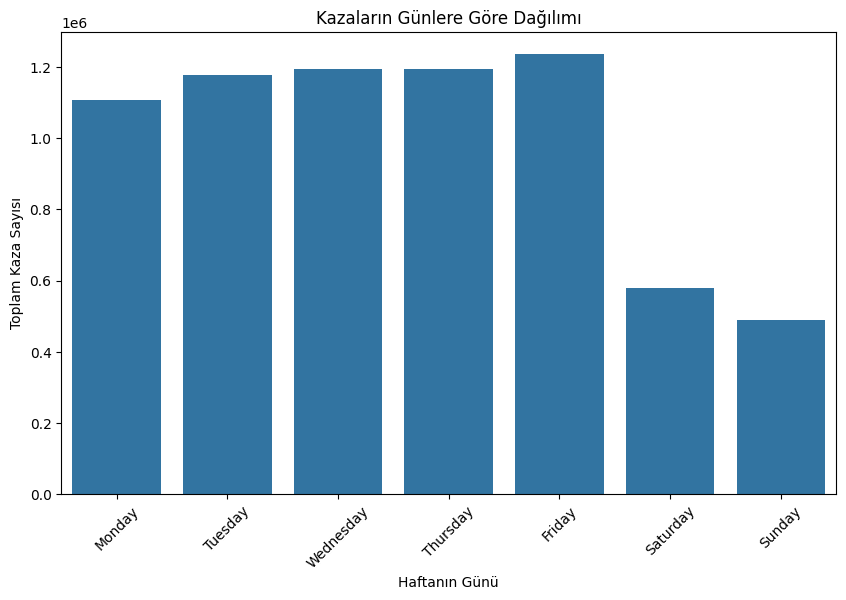

In [9]:
plt.figure(figsize=(10, 6))
# Haftanın günlerini doğru sırada göstermek için order parametresini kullanıyoruz
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='DayOfWeek', data=df, order=days_order)
plt.title('Kazaların Günlere Göre Dağılımı')
plt.xlabel('Haftanın Günü')
plt.ylabel('Toplam Kaza Sayısı')
plt.xticks(rotation=45)
plt.show()

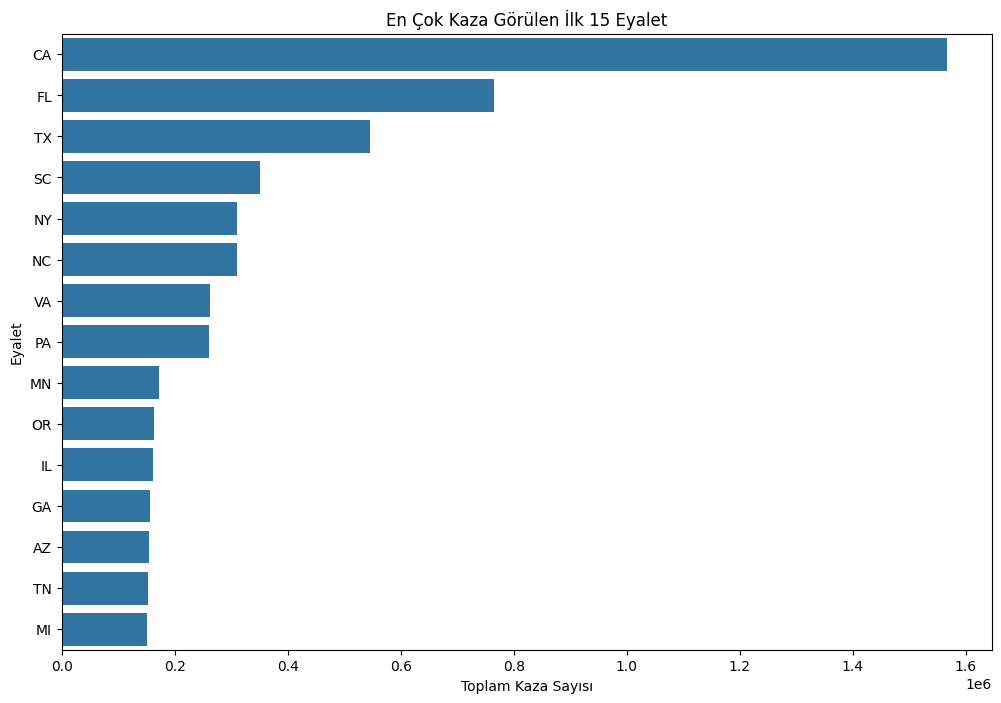

In [10]:
# En çok kaza olan ilk 15 eyalet
top_states = df['State'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_states.index, x=top_states.values, orient='h')
plt.title('En Çok Kaza Görülen İlk 15 Eyalet')
plt.xlabel('Toplam Kaza Sayısı')
plt.ylabel('Eyalet')
plt.show()

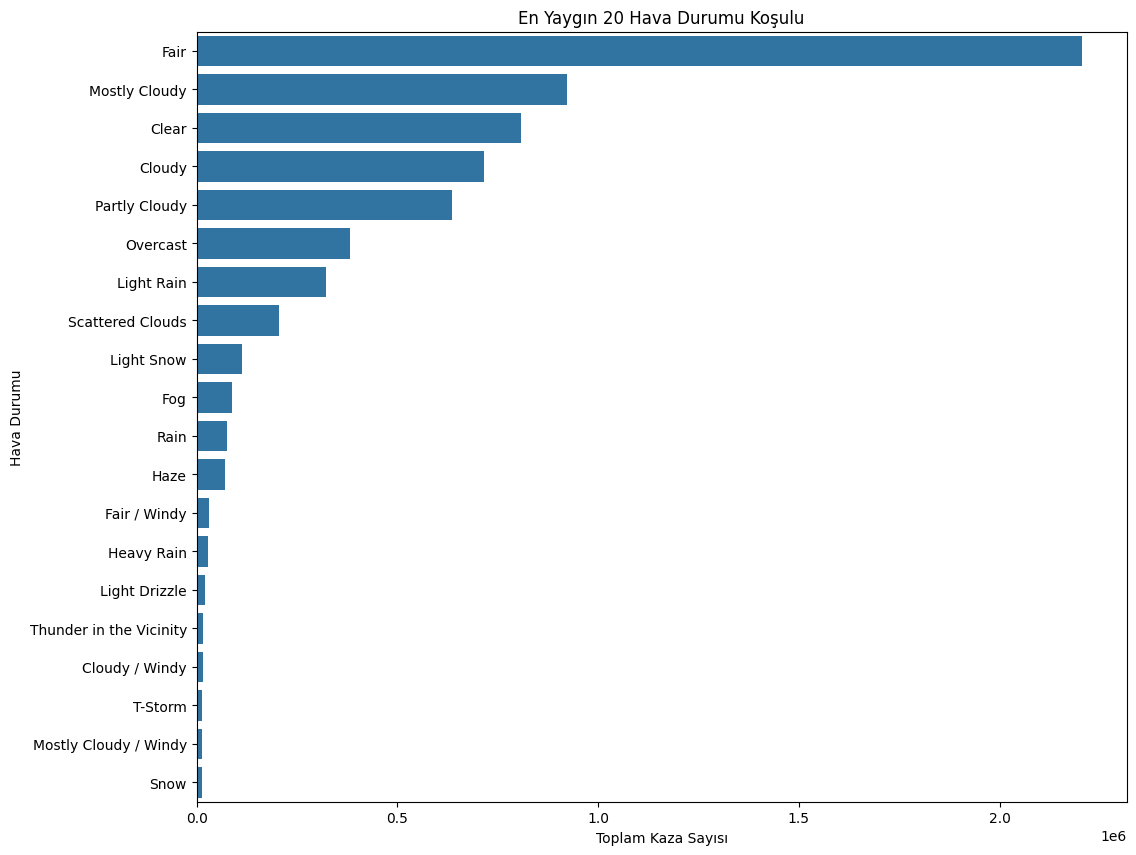

In [11]:
# En yaygın 20 hava durumu
top_weather = df['Weather_Condition'].value_counts().nlargest(20)

plt.figure(figsize=(12, 10))
sns.barplot(y=top_weather.index, x=top_weather.values, orient='h')
plt.title('En Yaygın 20 Hava Durumu Koşulu')
plt.xlabel('Toplam Kaza Sayısı')
plt.ylabel('Hava Durumu')
plt.show()

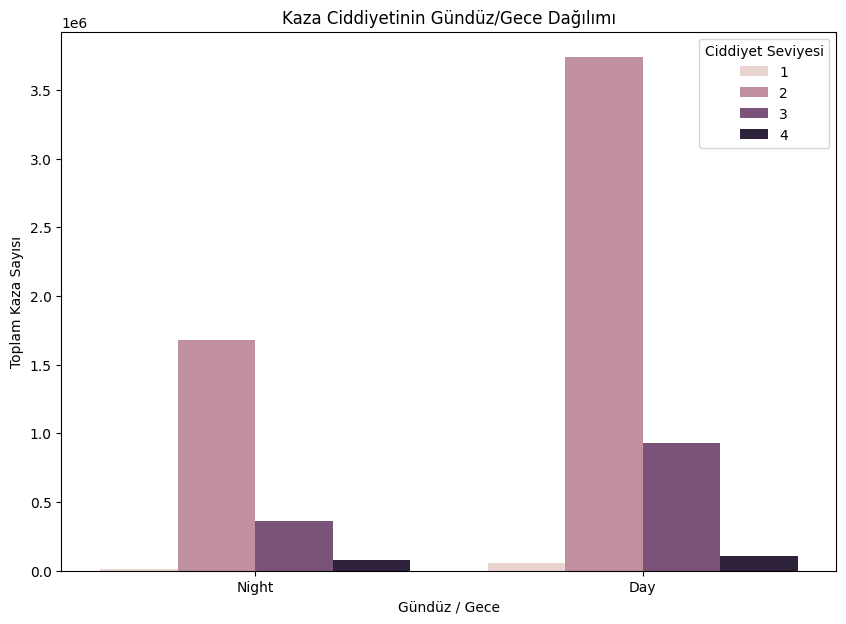

In [12]:
# Sunrise_Sunset ve Severity arasındaki ilişki
plt.figure(figsize=(10, 7))
sns.countplot(x='Sunrise_Sunset', hue='Severity', data=df)
plt.title('Kaza Ciddiyetinin Gündüz/Gece Dağılımı')
plt.xlabel('Gündüz / Gece')
plt.ylabel('Toplam Kaza Sayısı')
plt.legend(title='Ciddiyet Seviyesi')
plt.show()


In [13]:
# Hafta Sonu mu? (Is_Weekend)
# Hafta sonu günleri trafikte farklı bir davranış sergiler.
df['Is_Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])

#(Is_Rush_Hour)
# Saatlik dağılım grafiğinde gördüğümüz zirveleri modele işaretleyelim.
# Sabah 7-9 ve öğleden sonra 15-18 arasını yoğun saatler olarak kabul edelim.
df['Is_Rush_Hour'] = df['Hour'].isin([7, 8, 9, 15, 16, 17, 18])


# Oluşturduğumuz yeni sütunlara bakalım
print("Yeni türetilen 'akıllı' zaman özellikleri:")
print(df[['Hour', 'DayOfWeek', 'Is_Weekend', 'Is_Rush_Hour']].sample(10)) # Rastgele 10 örnek

Yeni türetilen 'akıllı' zaman özellikleri:
         Hour DayOfWeek  Is_Weekend  Is_Rush_Hour
4765105    16  Thursday       False          True
972903      4  Thursday       False         False
3384284     9   Tuesday       False          True
5380886    16   Tuesday       False          True
3623517    10  Thursday       False         False
2280274    15  Saturday        True          True
2786514    18   Tuesday       False          True
1955819     9  Saturday        True          True
6448310     8   Tuesday       False          True
3566941     4    Monday       False         False


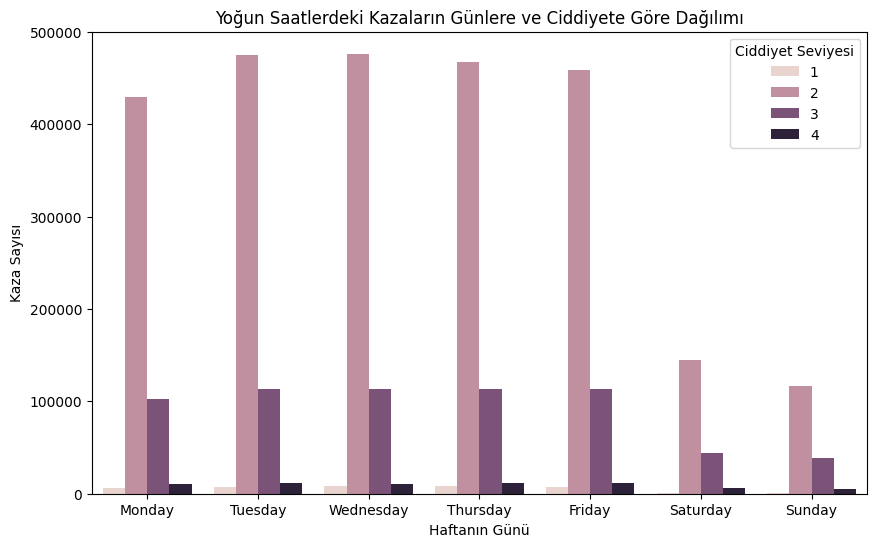

In [14]:
# Yoğun saatlerdeki kazaları filtrele
rush_hour_accidents = df[df['Is_Rush_Hour'] == True]

plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', hue='Severity', data=rush_hour_accidents, order=days_order)
plt.title('Yoğun Saatlerdeki Kazaların Günlere ve Ciddiyete Göre Dağılımı')
plt.xlabel('Haftanın Günü')
plt.ylabel('Kaza Sayısı')
plt.legend(title='Ciddiyet Seviyesi')
plt.show()

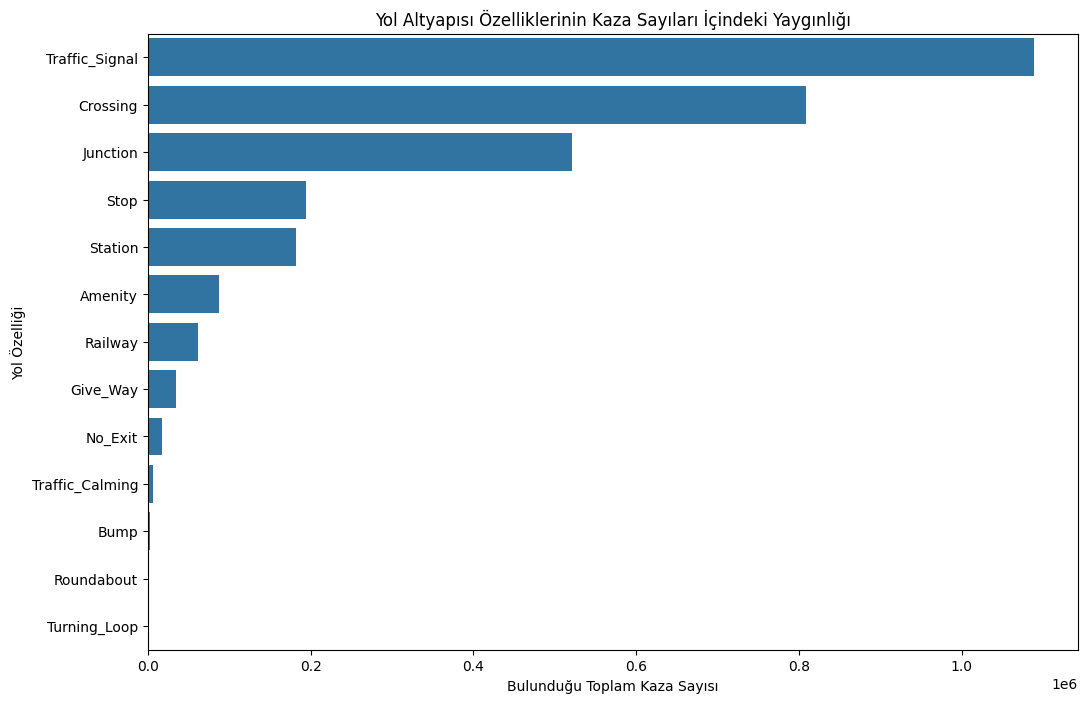

In [15]:
# Tüm bool tipindeki altyapı sütunları
bool_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
             'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
             'Traffic_Calming', 'Turning_Loop', 'Traffic_Signal']

# Her bir özelliğin kaç kazada bulunduğun
feature_counts = df[bool_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_counts.values, y=feature_counts.index, orient='h')
plt.title('Yol Altyapısı Özelliklerinin Kaza Sayıları İçindeki Yaygınlığı')
plt.xlabel('Bulunduğu Toplam Kaza Sayısı')
plt.ylabel('Yol Özelliği')
plt.show()

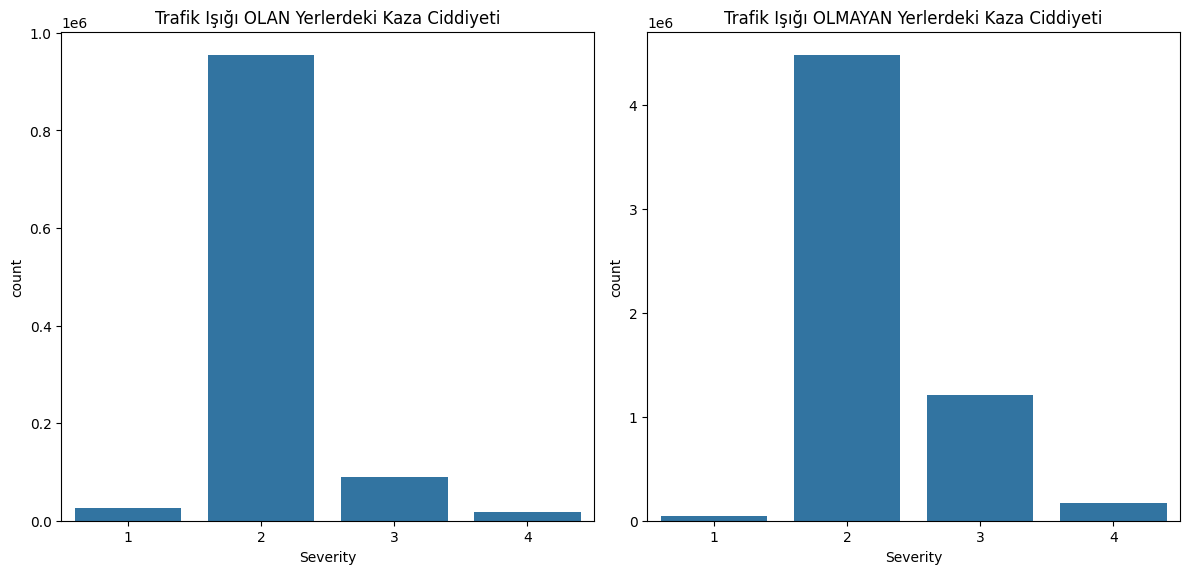

In [16]:
# Trafik ışığı olan ve olmayan yerlerdeki kaza ciddiyetini karşılaştıralım
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Severity', data=df[df['Traffic_Signal'] == True])
plt.title('Trafik Işığı OLAN Yerlerdeki Kaza Ciddiyeti')

plt.subplot(1, 2, 2)
sns.countplot(x='Severity', data=df[df['Traffic_Signal'] == False])
plt.title('Trafik Işığı OLMAYAN Yerlerdeki Kaza Ciddiyeti')

plt.tight_layout()
plt.show()

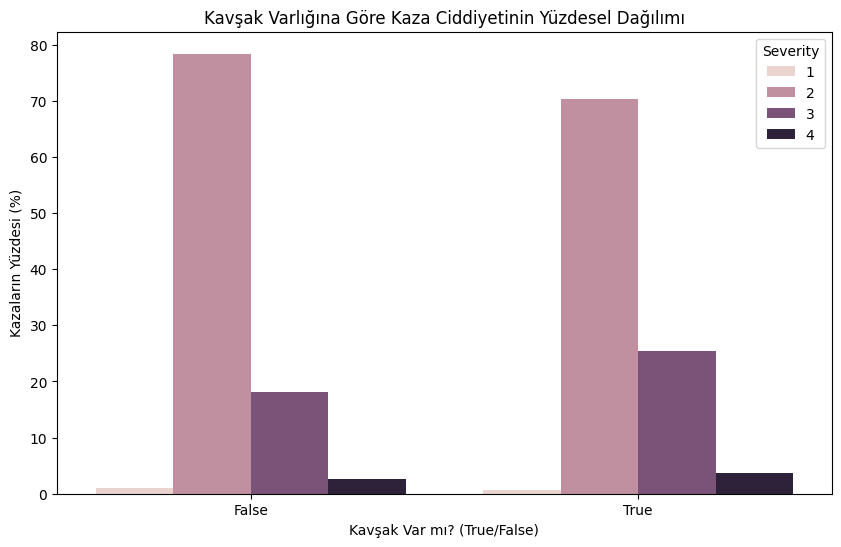

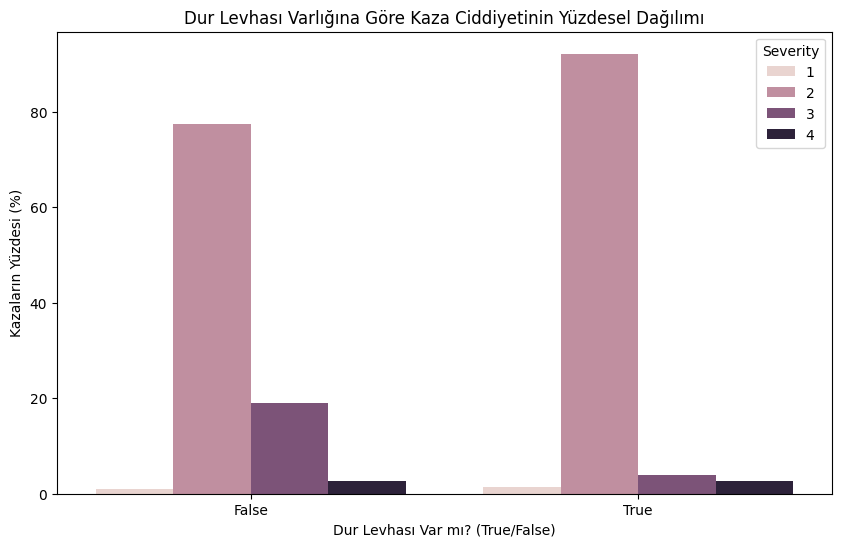

In [17]:
# Junction (Kavşak) özelliğinin ciddiyete etkisini inceleyelim
junction_severity = df.groupby('Junction')['Severity'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Junction', y='percentage', hue='Severity', data=junction_severity)
plt.title('Kavşak Varlığına Göre Kaza Ciddiyetinin Yüzdesel Dağılımı')
plt.ylabel('Kazaların Yüzdesi (%)')
plt.xlabel('Kavşak Var mı? (True/False)')
plt.show()


# Stop (Dur Levhası) özelliğinin ciddiyete etkisini inceleyelim
stop_severity = df.groupby('Stop')['Severity'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Stop', y='percentage', hue='Severity', data=stop_severity)
plt.title('Dur Levhası Varlığına Göre Kaza Ciddiyetinin Yüzdesel Dağılımı')
plt.ylabel('Kazaların Yüzdesi (%)')
plt.xlabel('Dur Levhası Var mı? (True/False)')
plt.show()

Yağış verisi işleniyor...
Yeni 'Was_Precipitation' (Yağış Var mıydı?) özelliği oluşturuldu.

Oluşturulan özelliğin dağılımı:
Was_Precipitation
False    6503959
True      481269
Name: count, dtype: int64

Grafik oluşturuluyor...


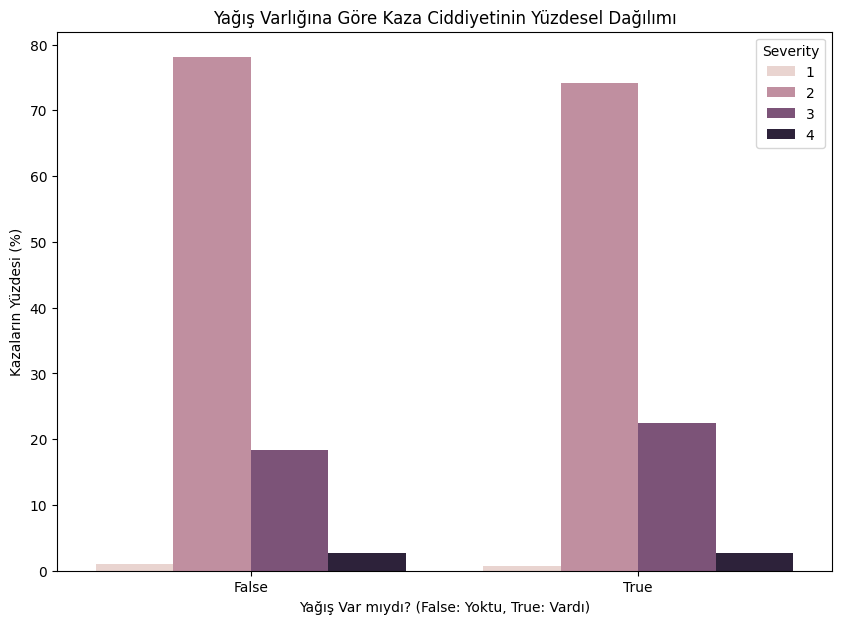

In [18]:
#Yağış (Precipitation) Özellik Mühendisliği 

print("Yağış verisi işleniyor...")

# Gerekçe: Ham 'Precipitation(in)' sütunundaki eksik verileri yönetmek ve
# modeli için daha anlamlı bir sinyal oluşturmak.

# Önce 'Precipitation(in)' sütunundaki eksik değerleri (NaN) 0.0 ile dolduralım.
df['Precipitation(in)'].fillna(0.0, inplace=True)

# 'Was_Precipitation' adında yeni bir bool (True/False) sütunu oluşturalım.
df['Was_Precipitation'] = df['Precipitation(in)'] > 0.0

# Orijinal sütunu artık silebiliriz (isteğe bağlı, analiz için tutabilirsin de)
# df.drop(columns=['Precipitation(in)'], inplace=True)

print("Yeni 'Was_Precipitation' (Yağış Var mıydı?) özelliği oluşturuldu.")
print("\nOluşturulan özelliğin dağılımı:")
print(df['Was_Precipitation'].value_counts())


# --- Yağış Varlığının Ciddiyete Etkisi Analizi (DF ÜZERİNDE) ---
print("\nGrafik oluşturuluyor...")

# Yüzdesel dağılımı hesaplayalım
precipitation_severity = df.groupby('Was_Precipitation')['Severity'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='Was_Precipitation', y='percentage', hue='Severity', data=precipitation_severity)
plt.title('Yağış Varlığına Göre Kaza Ciddiyetinin Yüzdesel Dağılımı')
plt.ylabel('Kazaların Yüzdesi (%)')
plt.xlabel('Yağış Var mıydı? (False: Yoktu, True: Vardı)')
plt.show()

In [19]:
# Yağış (Precipitation) Sütunundaki NaN'ları 0 ile Doldurma 

# Başlangıçtaki eksik veri sayısını görelim
initial_nulls = df['Precipitation(in)'].isnull().sum()
print(f"İşlem öncesi 'Precipitation(in)' sütunundaki eksik veri sayısı: {initial_nulls}")

# Gerekçe: Eksik yağış verisinin, pratikte "yağış yok" anlamına gelmesi en olası senaryodur.
# Bu yüzden tüm NaN değerlerini 0.0 ile değiştiriyoruz.
df['Precipitation(in)'].fillna(0.0, inplace=True)

# Son durumu kontrol edelim
final_nulls = df['Precipitation(in)'].isnull().sum()
print(f"İşlem sonrası 'Precipitation(in)' sütunundaki eksik veri sayısı: {final_nulls}")

# Verinin ilk birkaç satırına bakarak 0.0'ların geldiğini görelim
print("\nSütunun son hali (örnekler):")
print(df['Precipitation(in)'].head())

İşlem öncesi 'Precipitation(in)' sütunundaki eksik veri sayısı: 0
İşlem sonrası 'Precipitation(in)' sütunundaki eksik veri sayısı: 0

Sütunun son hali (örnekler):
0    0.02
1    0.00
2    0.00
3    0.00
4    0.00
Name: Precipitation(in), dtype: float64


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Günün Vakti (Time_of_Day) Özellik Mühendisliği 

print("Günü anlamlı zaman dilimlerine ayıran 'Time_of_Day' özelliği oluşturuluyor...")

# Gerekçe: 'Hour' sütunundaki 24 farklı değeri, davranışsal olarak benzer olan
# 4 ana gruba ayırarak modelin daha genel kalıplar öğrenmesini sağlıyoruz.

# Saat dilimlerini tanımlayan bir fonksiyon yazalım
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'  # Sabah (05:00 - 11:59)
    elif 12 <= hour < 17:
        return 'Afternoon' # Öğleden Sonra (12:00 - 16:59)
    elif 17 <= hour < 21:
        return 'Evening'   # Akşam (17:00 - 20:59)
    else:
        return 'Night'     # Gece (21:00 - 04:59)

# Bu fonksiyonu 'Hour' sütununa uygulayarak yeni özelliği oluşturalım
# df['Hour'] sütununun daha önce oluşturulduğundan emin olmalıyız.
if 'Hour' not in df.columns:
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    df['Hour'] = df['Start_Time'].dt.hour

df['Time_of_Day'] = df['Hour'].apply(get_time_of_day)

print("Yeni özellik başarıyla oluşturuldu.")
print("\nOluşturulan özelliğin dağılımı:")
print(df['Time_of_Day'].value_counts())

Günü anlamlı zaman dilimlerine ayıran 'Time_of_Day' özelliği oluşturuluyor...
Yeni özellik başarıyla oluşturuldu.

Oluşturulan özelliğin dağılımı:
Time_of_Day
Morning      2643097
Afternoon    2047528
Evening      1376175
Night         918428
Name: count, dtype: int64


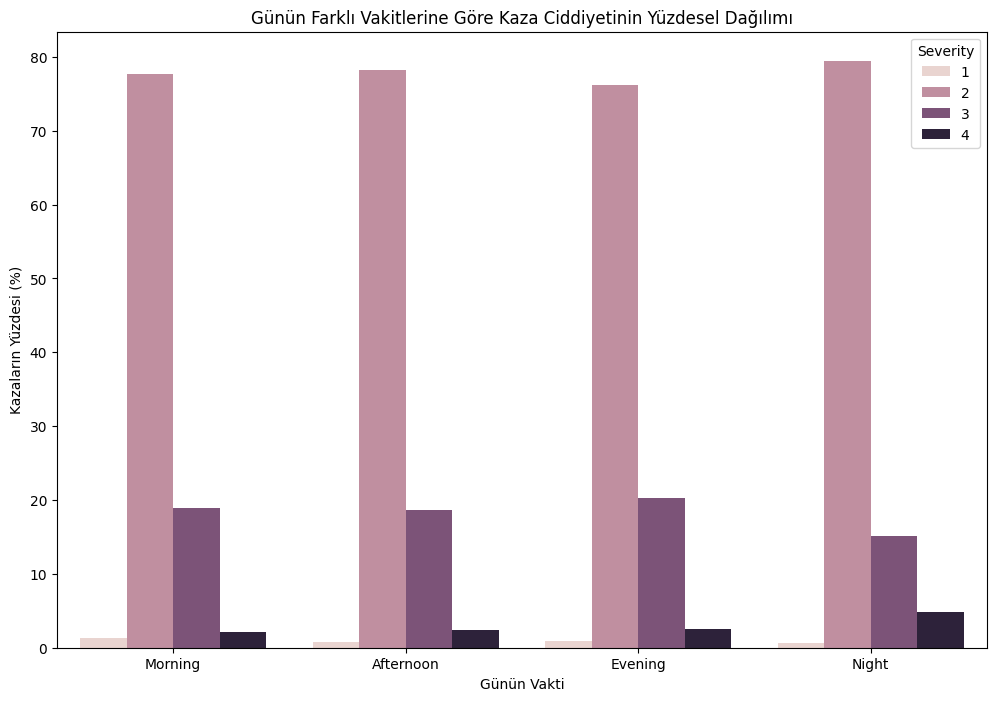

In [21]:
# Zaman Dilimlerinin Ciddiyete Etkisi Analizi 

# Yüzdesel dağılımı hesaplayalım
time_of_day_severity = df.groupby('Time_of_Day')['Severity'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

# Grafiği çizelim
plt.figure(figsize=(12, 8))
sns.barplot(x='Time_of_Day', y='percentage', hue='Severity', data=time_of_day_severity, 
            order=['Morning', 'Afternoon', 'Evening', 'Night']) # Mantıklı bir sırada göstermek için
plt.title('Günün Farklı Vakitlerine Göre Kaza Ciddiyetinin Yüzdesel Dağılımı')
plt.ylabel('Kazaların Yüzdesi (%)')
plt.xlabel('Günün Vakti')
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# "Gece + Hafta Sonu" Etkileşim Özelliği Mühendisliği 

print("En tehlikeli kombinasyon olabilecek 'Is_Night_Weekend' özelliği oluşturuluyor...")

# Gerekçe: İki önemli risk faktörünün (gece ve hafta sonu) birleşiminin,
# tek başlarına olduklarından daha güçlü bir sinyal oluşturup oluşturmadığını test ediyoruz.

# 'Is_Night_Weekend' özelliğini oluşturalım
df['Is_Night_Weekend'] = (df['Time_of_Day'] == 'Night') & (df['Is_Weekend'] == True)

print("Yeni özellik başarıyla oluşturuldu.")
print("\nOluşturulan özelliğin dağılımı:")
print(df['Is_Night_Weekend'].value_counts())

En tehlikeli kombinasyon olabilecek 'Is_Night_Weekend' özelliği oluşturuluyor...
Yeni özellik başarıyla oluşturuldu.

Oluşturulan özelliğin dağılımı:
Is_Night_Weekend
False    6737973
True      247255
Name: count, dtype: int64


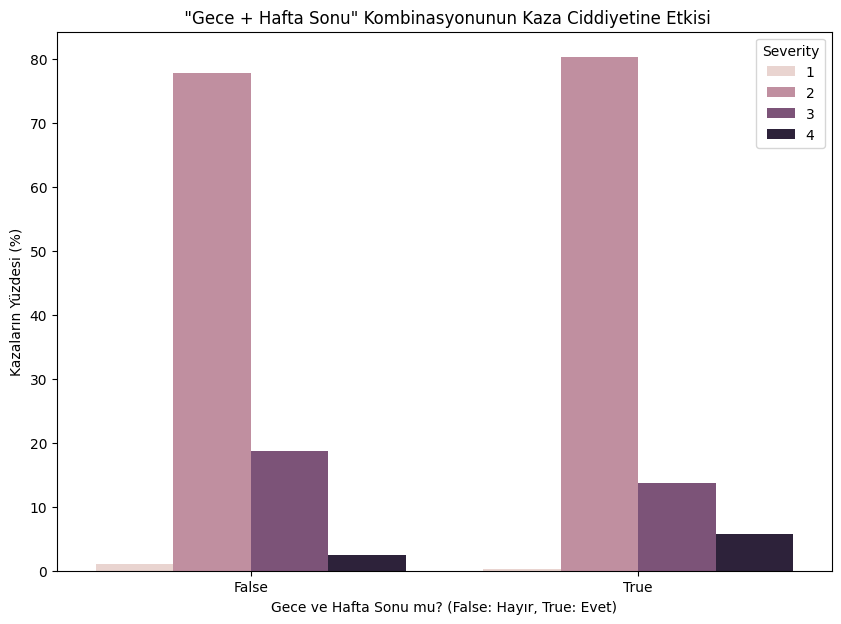

In [23]:
# "Gece + Hafta Sonu" Kombinasyonunun Ciddiyete Etkisi Analizi 

# Yüzdesel dağılımı hesaplayalım
night_weekend_severity = df.groupby('Is_Night_Weekend')['Severity'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

# Grafiği çizelim
plt.figure(figsize=(10, 7))
sns.barplot(x='Is_Night_Weekend', y='percentage', hue='Severity', data=night_weekend_severity)
plt.title(' "Gece + Hafta Sonu" Kombinasyonunun Kaza Ciddiyetine Etkisi')
plt.ylabel('Kazaların Yüzdesi (%)')
plt.xlabel('Gece ve Hafta Sonu mu? (False: Hayır, True: Evet)')
plt.show()

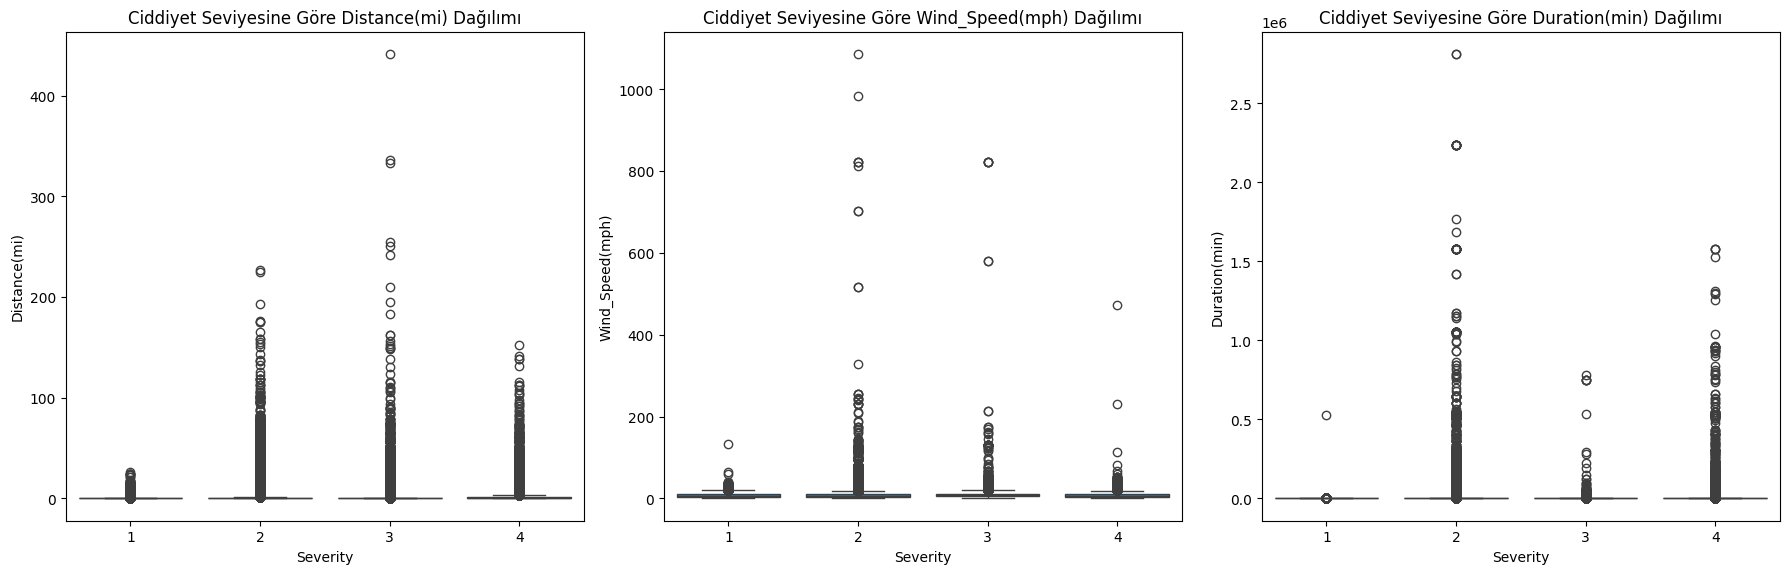

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ZAMANSAL ÖZELLİK MÜHENDİSLİĞi
# Bu blok, 'Duration(min)' sütununu oluşturur.

# Start_Time ve End_Time'ı datetime'a çevir
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df.dropna(subset=['Start_Time', 'End_Time'], inplace=True)

# 'Duration(min)' sütununu hesapla
df['Duration(min)'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60
df.loc[df['Duration(min)'] < 0, 'Duration(min)'] = 0

# (Diğer zaman özellikleri de burada oluşturulabilir: Hour, DayOfWeek vb.)
# Düşük değerli sayısal özellikleri seçelim
cols_to_check = ['Distance(mi)', 'Wind_Speed(mph)', 'Duration(min)']

plt.figure(figsize=(18, 6))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i+1)
    sns.boxplot(x='Severity', y=col, data=df)
    plt.title(f'Ciddiyet Seviyesine Göre {col} Dağılımı') 

plt.tight_layout()
plt.show()

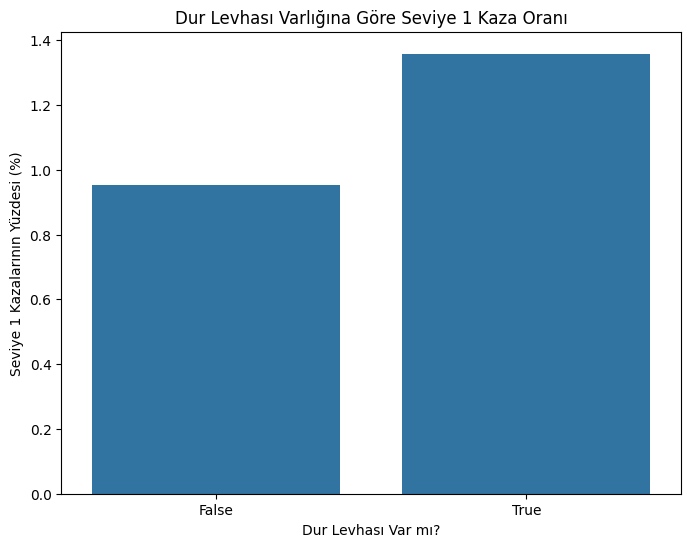

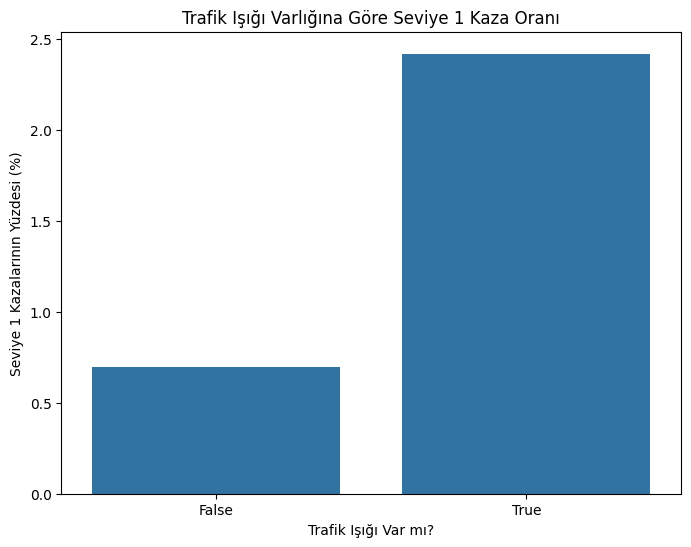

In [25]:
# 'Stop' (Dur Levhası) varlığının Seviye 1 kazaları üzerindeki etkisine bakalım
stop_sev1 = df.groupby('Stop')['Severity'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
stop_sev1_filtered = stop_sev1[stop_sev1['Severity'] == 1] # Sadece Seviye 1'e odaklan

plt.figure(figsize=(8, 6))
sns.barplot(x='Stop', y='percentage', data=stop_sev1_filtered)
plt.title('Dur Levhası Varlığına Göre Seviye 1 Kaza Oranı')
plt.ylabel('Seviye 1 Kazalarının Yüzdesi (%)')
plt.xlabel('Dur Levhası Var mı?')
plt.show()

# 'Traffic_Signal' (Trafik Işığı) varlığının Seviye 1 kazaları üzerindeki etkisine bakalım
signal_sev1 = df.groupby('Traffic_Signal')['Severity'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
signal_sev1_filtered = signal_sev1[signal_sev1['Severity'] == 1] # Sadece Seviye 1'e odaklan

plt.figure(figsize=(8, 6))
sns.barplot(x='Traffic_Signal', y='percentage', data=signal_sev1_filtered)
plt.title('Trafik Işığı Varlığına Göre Seviye 1 Kaza Oranı')
plt.ylabel('Seviye 1 Kazalarının Yüzdesi (%)')
plt.xlabel('Trafik Işığı Var mı?')
plt.show()

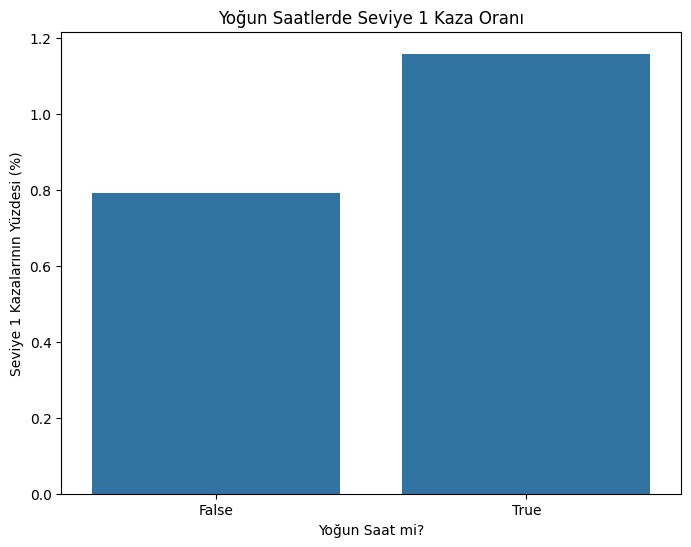

In [26]:
# 'Is_Rush_Hour' özelliğinin Seviye 1 kazaları üzerindeki etkisine bakalım
rush_hour_sev1 = df.groupby('Is_Rush_Hour')['Severity'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
rush_hour_sev1_filtered = rush_hour_sev1[rush_hour_sev1['Severity'] == 1]

plt.figure(figsize=(8, 6))
sns.barplot(x='Is_Rush_Hour', y='percentage', data=rush_hour_sev1_filtered)
plt.title('Yoğun Saatlerde Seviye 1 Kaza Oranı')
plt.ylabel('Seviye 1 Kazalarının Yüzdesi (%)')
plt.xlabel('Yoğun Saat mi?')
plt.show()

In [27]:
# 'Is_Stop_and_Go_Traffic' adında yeni bir özellik oluşturalım.
# Bu özellik, hem yoğun saatlerde hem de bir kontrol noktasında (ışık VEYA dur) olan kazaları işaretler.

df['Is_Stop_and_Go_Traffic'] = (df['Is_Rush_Hour'] == True) & \
                                ( (df['Traffic_Signal'] == True) | (df['Stop'] == True) )

print("Yeni 'Is_Stop_and_Go_Traffic' özelliğinin dağılımı:")
print(df['Is_Stop_and_Go_Traffic'].value_counts())

Yeni 'Is_Stop_and_Go_Traffic' özelliğinin dağılımı:
Is_Stop_and_Go_Traffic
False    6336009
True      649219
Name: count, dtype: int64



'Is_Stop_and_Go_Traffic' özelliğinin kaza ciddiyetine etkisi analiz ediliyor...


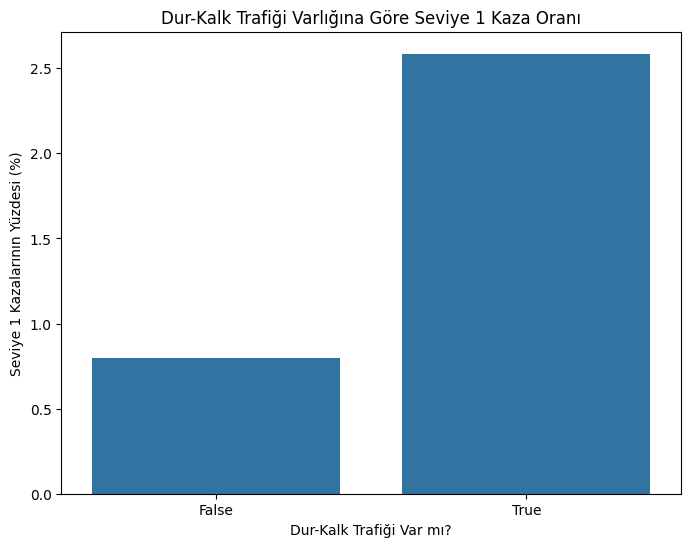

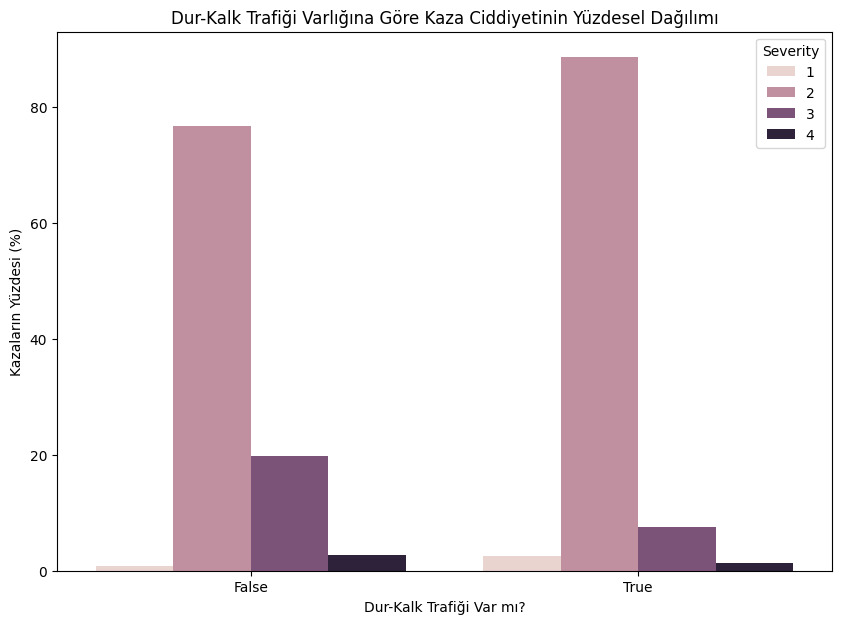

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#  "Is_Stop_and_Go_Traffic" Özelliğinin Ciddiyete Etkisi Analizi 

print("\n'Is_Stop_and_Go_Traffic' özelliğinin kaza ciddiyetine etkisi analiz ediliyor...")

# Yüzdesel dağılımı hesaplayalım
stop_go_severity = df.groupby('Is_Stop_and_Go_Traffic')['Severity'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

# Sadece Seviye 1'e odaklanan bir filtreli veri oluşturalım (daha net görmek için)
stop_go_sev1_filtered = stop_go_severity[stop_go_severity['Severity'] == 1]

#  İKİ FARKLI GÖRSELLEŞTİRME 

# 1. Sadece Seviye 1 Oranlarını Karşılaştıran Basit Grafik
plt.figure(figsize=(8, 6))
sns.barplot(x='Is_Stop_and_Go_Traffic', y='percentage', data=stop_go_sev1_filtered)
plt.title('Dur-Kalk Trafiği Varlığına Göre Seviye 1 Kaza Oranı')
plt.ylabel('Seviye 1 Kazalarının Yüzdesi (%)')
plt.xlabel('Dur-Kalk Trafiği Var mı?')
plt.show()


# 2. Tüm Ciddiyet Seviyelerini Birlikte Gösteren Detaylı Grafik
plt.figure(figsize=(10, 7))
sns.barplot(x='Is_Stop_and_Go_Traffic', y='percentage', hue='Severity', data=stop_go_severity)
plt.title('Dur-Kalk Trafiği Varlığına Göre Kaza Ciddiyetinin Yüzdesel Dağılımı')
plt.ylabel('Kazaların Yüzdesi (%)')
plt.xlabel('Dur-Kalk Trafiği Var mı?')
plt.show()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df'in yüklü olduğunu varsayıyoruz.

#  Yol Tipi (Road_Type) Özellik Mühendisliği 
print("Sokak adlarından yol tipi özelliği türetiliyor...")

# 'Street' sütunundaki eksik verileri 'Unknown' ile dolduralım
df['Street'].fillna('Unknown', inplace=True)

# Otoyol ve ana yolları belirten anahtar kelimeler/kısaltmalar listesi
# Bu liste genişletilebilir. Regex ile daha güçlü hale getirilebilir.
highway_keywords = ['Hwy', 'Fwy', 'Pkwy', 'Expy', 'Blvd', 'Highway', 'Freeway', 'Parkway', 'Expressway', 'I-', 'US-', 'SR-']

# Yol tipini belirleyen bir fonksiyon yazalım
def get_road_type(street_name):
    # Eğer sokak adında otoyol anahtar kelimelerinden biri varsa
    if any(keyword in str(street_name) for keyword in highway_keywords):
        return 'Highway/Main_Road'
    # Eğer sokak adı bilinmiyorsa veya ana yol değilse
    else:
        return 'Local_Street'

# Bu fonksiyonu 'Street' sütununa uygulayarak yeni özelliği oluşturalım
df['Road_Type'] = df['Street'].apply(get_road_type)

print("Yeni 'Road_Type' özelliği başarıyla oluşturuldu.")
print("\nOluşturulan özelliğin dağılımı:")
print(df['Road_Type'].value_counts())

Sokak adlarından yol tipi özelliği türetiliyor...
Yeni 'Road_Type' özelliği başarıyla oluşturuldu.

Oluşturulan özelliğin dağılımı:
Road_Type
Local_Street         3617896
Highway/Main_Road    3367332
Name: count, dtype: int64


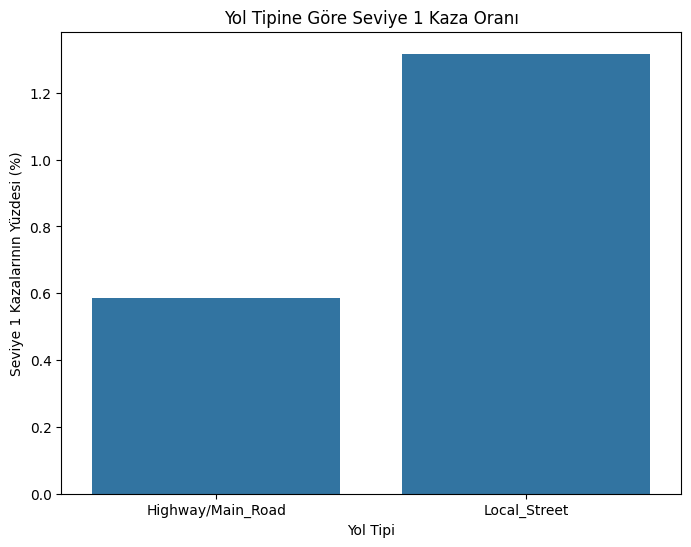

In [30]:
# Yol Tipinin Seviye 1'e Etkisi Analizi 

# Yüzdesel dağılımı hesaplayalım
road_type_sev1 = df.groupby('Road_Type')['Severity'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
road_type_sev1_filtered = road_type_sev1[road_type_sev1['Severity'] == 1] # Sadece Seviye 1'e odaklan

plt.figure(figsize=(8, 6))
sns.barplot(x='Road_Type', y='percentage', data=road_type_sev1_filtered)
plt.title('Yol Tipine Göre Seviye 1 Kaza Oranı')
plt.ylabel('Seviye 1 Kazalarının Yüzdesi (%)')
plt.xlabel('Yol Tipi')
plt.show()

In [31]:
# Hem 'Road_Type' hem de 'Is_Stop_and_Go_Traffic' özelliklerinin
# daha önce oluşturulduğunu varsayıyoruz.

df['Is_Low_Speed_Zone_Accident'] = (df['Road_Type'] == 'Local_Street') & \
                                    (df['Is_Stop_and_Go_Traffic'] == True)

print(df['Is_Low_Speed_Zone_Accident'].value_counts())

Is_Low_Speed_Zone_Accident
False    6484253
True      500975
Name: count, dtype: int64



'Is_Low_Speed_Zone_Accident' özelliğinin kaza ciddiyetine etkisi analiz ediliyor...


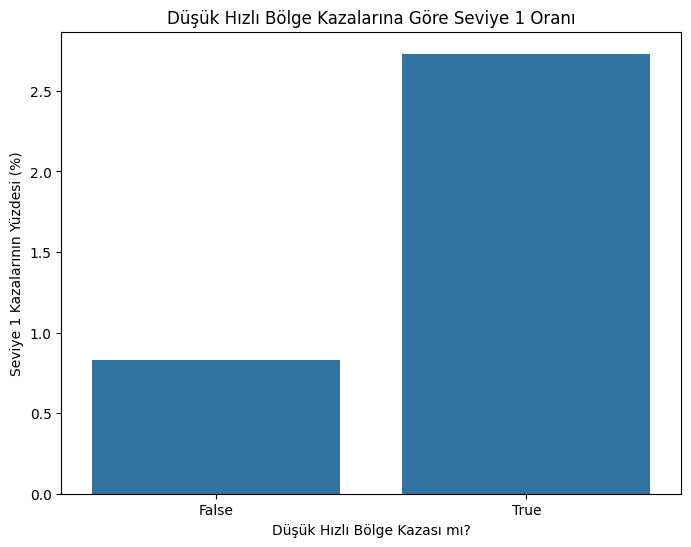

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# "Süper Özelliğin" Ciddiyete Etkisi Analizi 

print("\n'Is_Low_Speed_Zone_Accident' özelliğinin kaza ciddiyetine etkisi analiz ediliyor...")

# Yüzdesel dağılımı hesaplayalım
low_speed_severity = df.groupby('Is_Low_Speed_Zone_Accident')['Severity'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

# Sadece Seviye 1'e odaklanan bir filtreli veri oluşturalım
low_speed_sev1_filtered = low_speed_severity[low_speed_severity['Severity'] == 1]

# Grafiği çizelim
plt.figure(figsize=(8, 6))
sns.barplot(x='Is_Low_Speed_Zone_Accident', y='percentage', data=low_speed_sev1_filtered)
plt.title('Düşük Hızlı Bölge Kazalarına Göre Seviye 1 Oranı')
plt.ylabel('Seviye 1 Kazalarının Yüzdesi (%)')
plt.xlabel('Düşük Hızlı Bölge Kazası mı?')
plt.show()

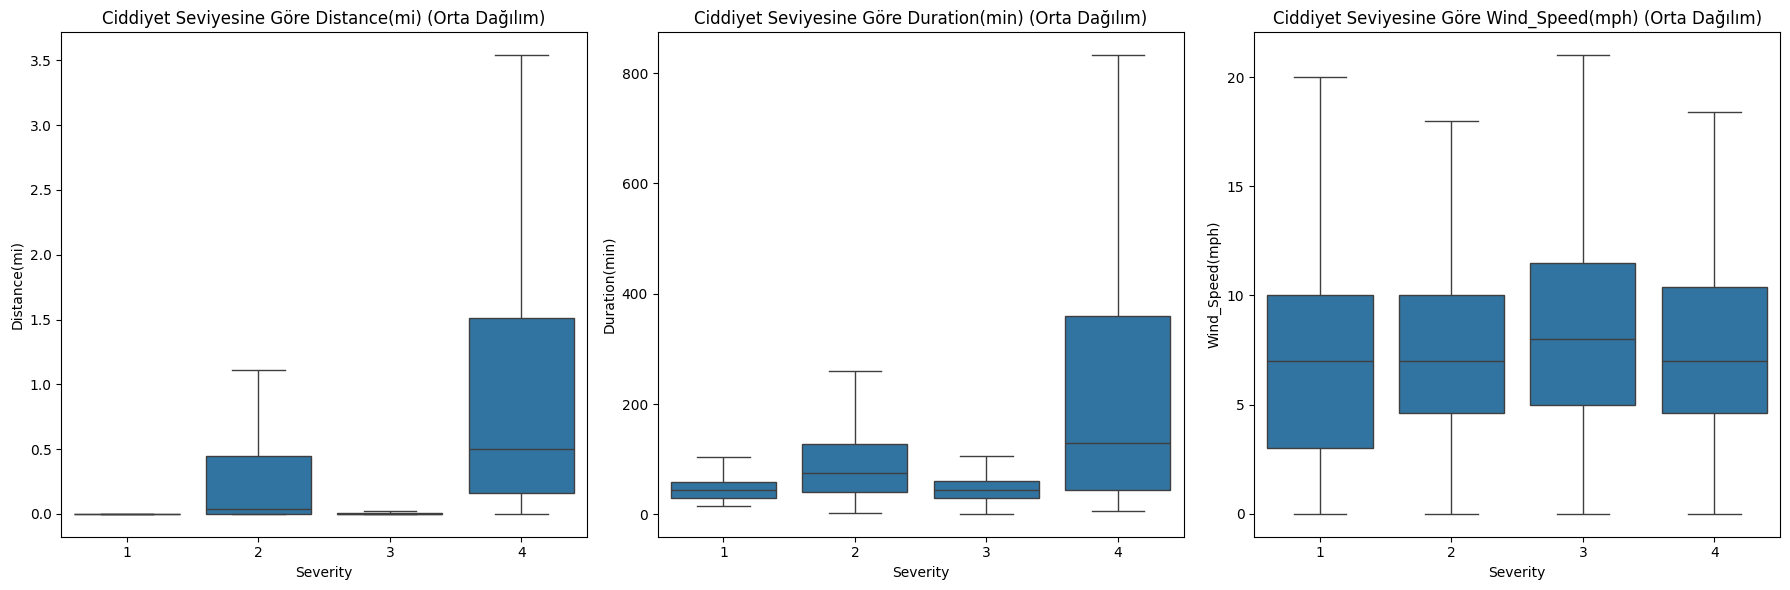

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_check = ['Distance(mi)', 'Duration(min)', 'Wind_Speed(mph)']

plt.figure(figsize=(18, 6))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i+1)
    sns.boxplot(x='Severity', y=col, data=df, showfliers=False) # showfliers=False, aykırı değerleri çizmeden kutuların kendisini daha net görmemizi sağlar
    plt.title(f'Ciddiyet Seviyesine Göre {col} (Orta Dağılım)')

plt.tight_layout()
plt.show()

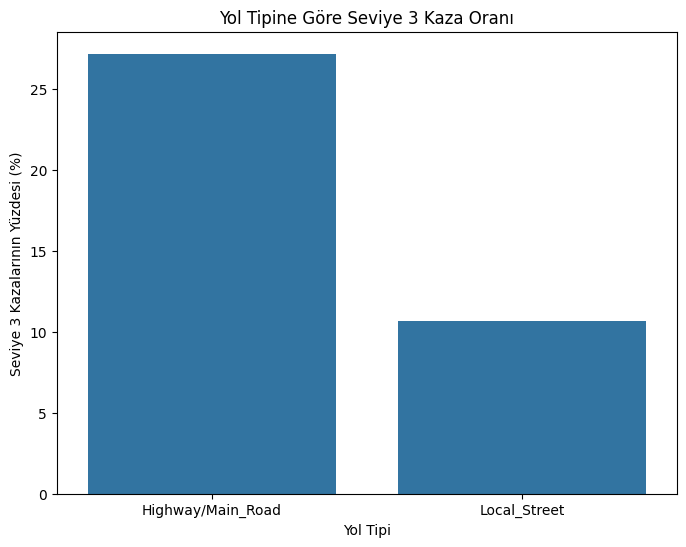

In [34]:
# 'Road_Type' özelliğinin daha önce oluşturulduğunu varsayıyoruz.
road_type_sev3 = df.groupby('Road_Type')['Severity'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
road_type_sev3_filtered = road_type_sev3[road_type_sev3['Severity'] == 3] # Sadece Seviye 3'e odaklan

plt.figure(figsize=(8, 6))
sns.barplot(x='Road_Type', y='percentage', data=road_type_sev3_filtered)
plt.title('Yol Tipine Göre Seviye 3 Kaza Oranı')
plt.ylabel('Seviye 3 Kazalarının Yüzdesi (%)')
plt.xlabel('Yol Tipi')
plt.show()

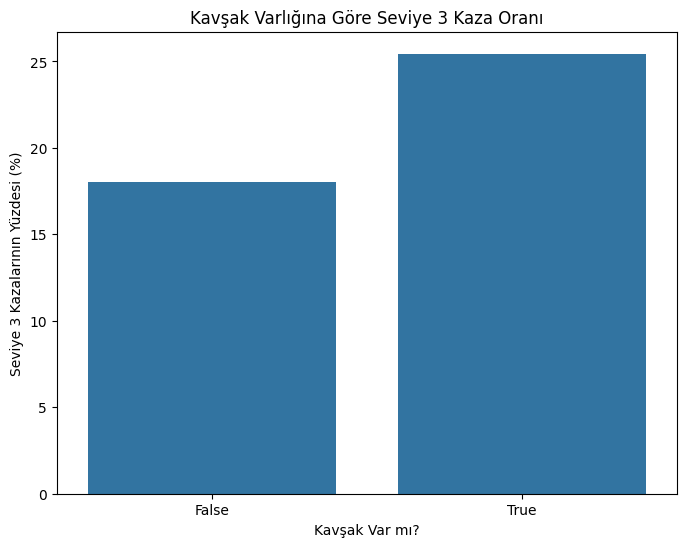

In [35]:
# 'Junction' özelliğinin Seviye 3 kazaları üzerindeki etkisine bakalım
junction_sev3 = df.groupby('Junction')['Severity'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
junction_sev3_filtered = junction_sev3[junction_sev3['Severity'] == 3] # Sadece Seviye 3'e odaklan

plt.figure(figsize=(8, 6))
sns.barplot(x='Junction', y='percentage', data=junction_sev3_filtered)
plt.title('Kavşak Varlığına Göre Seviye 3 Kaza Oranı')
plt.ylabel('Seviye 3 Kazalarının Yüzdesi (%)')
plt.xlabel('Kavşak Var mı?')
plt.show()

Yeni 'Is_High_Energy_Zone' özelliğinin Seviye 3 üzerindeki etkisini analiz edelim...


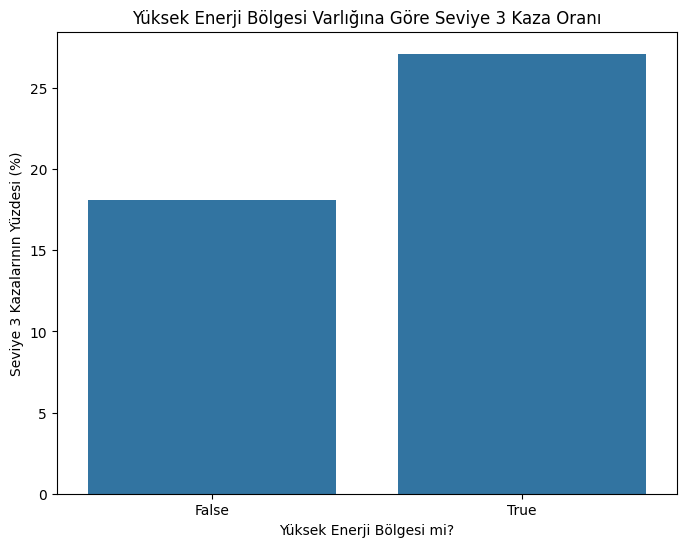

In [38]:
# 'Is_High_Energy_Zone' (Yüksek Enerji Bölgesi) adında yeni bir özellik oluşturalım
# Bu özellik, hem bir ana yolda hem de bir kavşakta olan, yani en riskli
# kesişim noktalarını işaretleyen kazaları bulur.

df['Is_High_Energy_Zone'] = (df['Road_Type'] == 'Highway/Main_Road') & \
                             (df['Junction'] == True)

print("Yeni 'Is_High_Energy_Zone' özelliğinin Seviye 3 üzerindeki etkisini analiz edelim...")

# Bu yeni özelliğin Seviye 3 oranını ne kadar artırdığını kontrol edelim
high_energy_sev3 = df.groupby('Is_High_Energy_Zone')['Severity'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
high_energy_sev3_filtered = high_energy_sev3[high_energy_sev3['Severity'] == 3]

plt.figure(figsize=(8, 6))
sns.barplot(x='Is_High_Energy_Zone', y='percentage', data=high_energy_sev3_filtered)
plt.title('Yüksek Enerji Bölgesi Varlığına Göre Seviye 3 Kaza Oranı')
plt.ylabel('Seviye 3 Kazalarının Yüzdesi (%)')
plt.xlabel('Yüksek Enerji Bölgesi mi?')
plt.show()

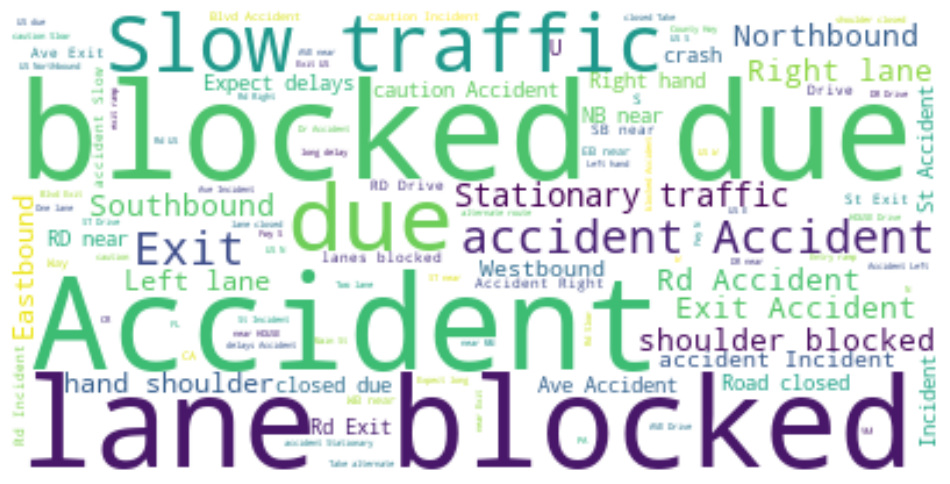

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Daha hızlı çalışması için 100,000 satırlık bir örneklem alalım
df_desc = df.sample(100000, random_state=42)

# Tüm açıklamaları tek bir dev metin haline getirelim
text = " ".join(review for review in df_desc['Description'].astype(str))

# Kelime bulutunu oluşturalım
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Grafiği çizelim
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Ciddiyet seviyelerini ve metinleri ayıralım
# Yine daha küçük bir örneklemle çalışmak mantıklı
df_desc = df[['Severity', 'Description']].dropna().sample(100000, random_state=42)

# Her bir ciddiyet seviyesi için en yaygın kelimeleri bulan bir fonksiyon yazalım
def get_top_n_words(corpus, n=None):
    # stop_words='english' ile "a", "the", "in" gibi anlamsız kelimeleri atlıyoruz
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Seviye 4 (en ciddi) kazaların açıklamalarını alalım
sev4_text = df_desc[df_desc['Severity'] == 4]['Description']
top_words_sev4 = get_top_n_words(sev4_text, 20)
print("--- Seviye 4 Kazalarındaki En Yaygın Kelimeler ---")
print(top_words_sev4)

sev4_text = df_desc[df_desc['Severity'] == 3]['Description']
top_words_sev4 = get_top_n_words(sev4_text, 20)
print("--- Seviye 3 Kazalarındaki En Yaygın Kelimeler ---")
print(top_words_sev4)

sev4_text = df_desc[df_desc['Severity'] == 1]['Description']
top_words_sev4 = get_top_n_words(sev4_text, 20)
print("--- Seviye 1 Kazalarındaki En Yaygın Kelimeler ---")
print(top_words_sev4)

# Karşılaştırma için Seviye 2 kazaların açıklamalarını alalım
sev2_text = df_desc[df_desc['Severity'] == 2]['Description']
top_words_sev2 = get_top_n_words(sev2_text, 20)
print("\n--- Seviye 2 Kazalarındaki En Yaygın Kelimeler ---")
print(top_words_sev2)

--- Seviye 4 Kazalarındaki En Yaygın Kelimeler ---
[('closed', np.int64(3839)), ('road', np.int64(2091)), ('accident', np.int64(1779)), ('rd', np.int64(1085)), ('exit', np.int64(1079)), ('near', np.int64(567)), ('route', np.int64(489)), ('alternate', np.int64(485)), ('incident', np.int64(472)), ('st', np.int64(386)), ('lanes', np.int64(356)), ('ave', np.int64(309)), ('crash', np.int64(261)), ('county', np.int64(240)), ('blocked', np.int64(186)), ('rt', np.int64(173)), ('nb', np.int64(158)), ('lane', np.int64(153)), ('delays', np.int64(149)), ('expect', np.int64(146))]
--- Seviye 3 Kazalarındaki En Yaygın Kelimeler ---
[('accident', np.int64(17569)), ('blocked', np.int64(12636)), ('exit', np.int64(12285)), ('lane', np.int64(9445)), ('northbound', np.int64(4907)), ('southbound', np.int64(4627)), ('rd', np.int64(4382)), ('right', np.int64(4130)), ('eastbound', np.int64(3551)), ('westbound', np.int64(3523)), ('left', np.int64(3221)), ('exits', np.int64(2919)), ('shoulder', np.int64(2827)),

In [41]:
# 'Description' sütununun küçük harfe çevrildiğini ve eksiklerinin doldurulduğunu varsayalım.
df['desc_lower'] = df['Description'].str.lower().fillna('')

# Seviye 4 Sinyali
df['FEAT_Is_Road_Closed'] = df['desc_lower'].str.contains('closed|closure|alternate route', na=False)

# Seviye 3 Sinyali
df['FEAT_Is_Lane_Blocked_On_Highway'] = df['desc_lower'].str.contains('blocked|lane', na=False) & \
                                        df['desc_lower'].str.contains('northbound|southbound|eastbound|westbound', na=False)

# Seviye 2 Sinyali
df['FEAT_Is_Local_Slowdown'] = df['desc_lower'].str.contains('traffic|slow|caution|stationary', na=False)

# Seviye 1 Sinyali
df['FEAT_Is_Minor_Crash'] = df['desc_lower'].str.contains('crash', na=False)

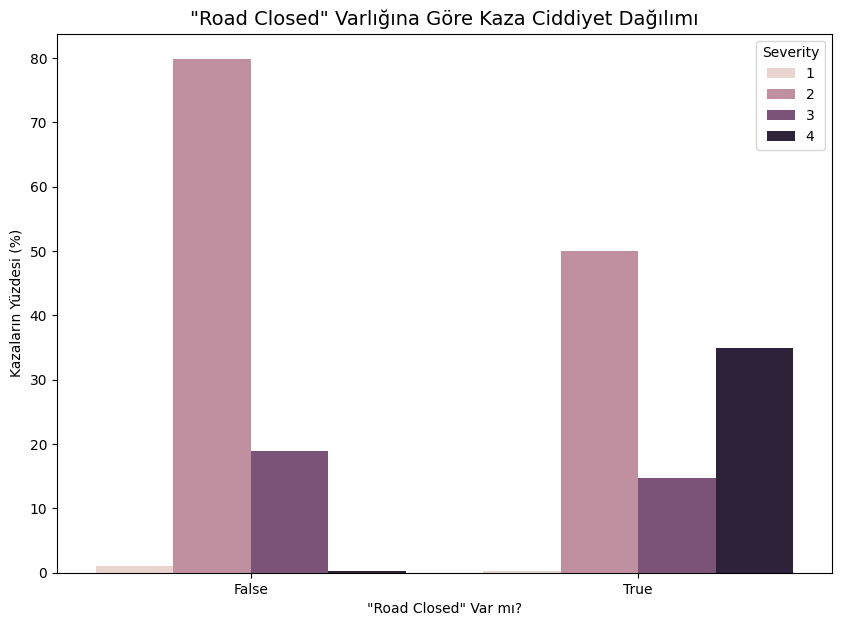

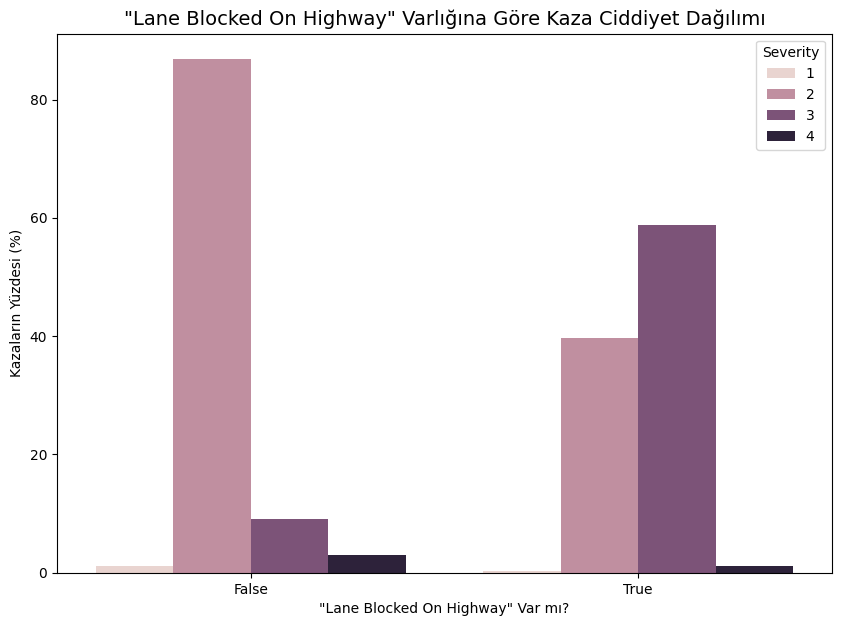

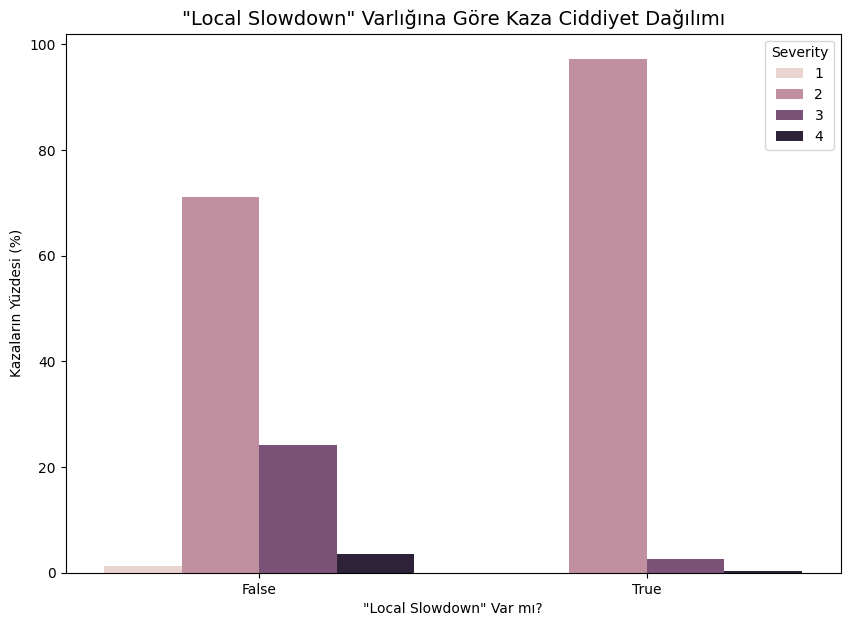

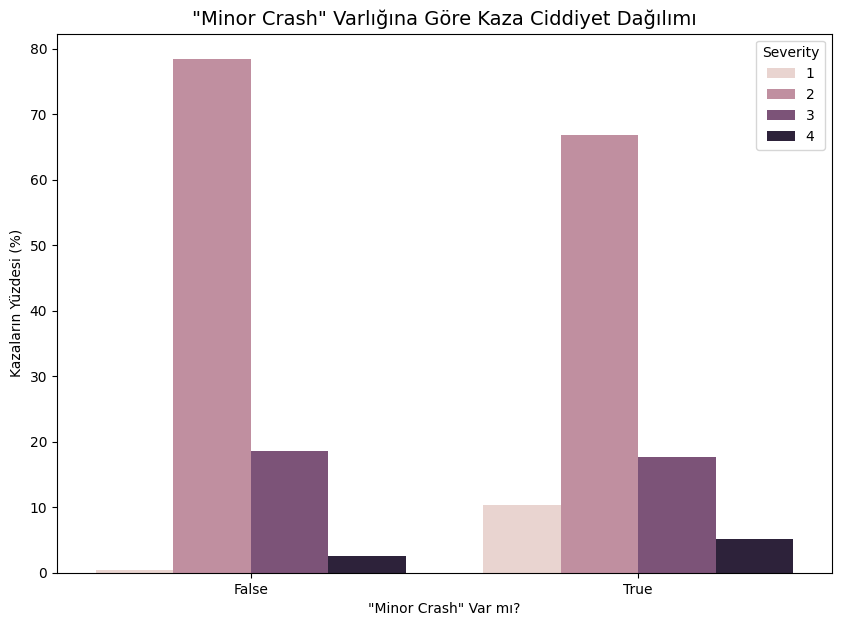

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analiz edilecek yeni özelliklerin listesi
feature_list = [
    'FEAT_Is_Road_Closed',
    'FEAT_Is_Lane_Blocked_On_Highway',
    'FEAT_Is_Local_Slowdown',
    'FEAT_Is_Minor_Crash'
]

# Her bir özellik için ayrı ayrı grafik çizelim
for feature in feature_list:
    # Yüzdesel dağılımı hesapla
    severity_dist = df.groupby(feature)['Severity'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    
    plt.figure(figsize=(10, 7))
    sns.barplot(x=feature, y='percentage', hue='Severity', data=severity_dist)
    
    # Grafik başlığını daha okunabilir yapalım
    title_text = feature.replace('FEAT_Is_', '').replace('_', ' ')
    plt.title(f'"{title_text}" Varlığına Göre Kaza Ciddiyet Dağılımı', fontsize=14)
    
    plt.ylabel('Kazaların Yüzdesi (%)')
    plt.xlabel(f'"{title_text}" Var mı?')
    plt.show()

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


# "Süper Sinyalleri" Birleştirme 

print("En güçlü iki sinyali birleştiren 'Is_Major_Disruption' özelliği oluşturuluyor...")

# Gerekçe: En ciddi (Seviye 4) ve orta-ciddi (Seviye 3) kazaları işaret eden
# en güçlü iki sinyali tek bir "Büyük Aksama" bayrağı altında birleştiriyoruz.
df['Is_Major_Disruption'] = (df['FEAT_Is_Road_Closed'] == True) | \
                             (df['FEAT_Is_Lane_Blocked_On_Highway'] == True)

print("Yeni özellik başarıyla oluşturuldu.")
print("\nOluşturulan özelliğin dağılımı:")
print(df['Is_Major_Disruption'].value_counts())

En güçlü iki sinyali birleştiren 'Is_Major_Disruption' özelliği oluşturuluyor...
Yeni özellik başarıyla oluşturuldu.

Oluşturulan özelliğin dağılımı:
Is_Major_Disruption
False    5267847
True     1717381
Name: count, dtype: int64


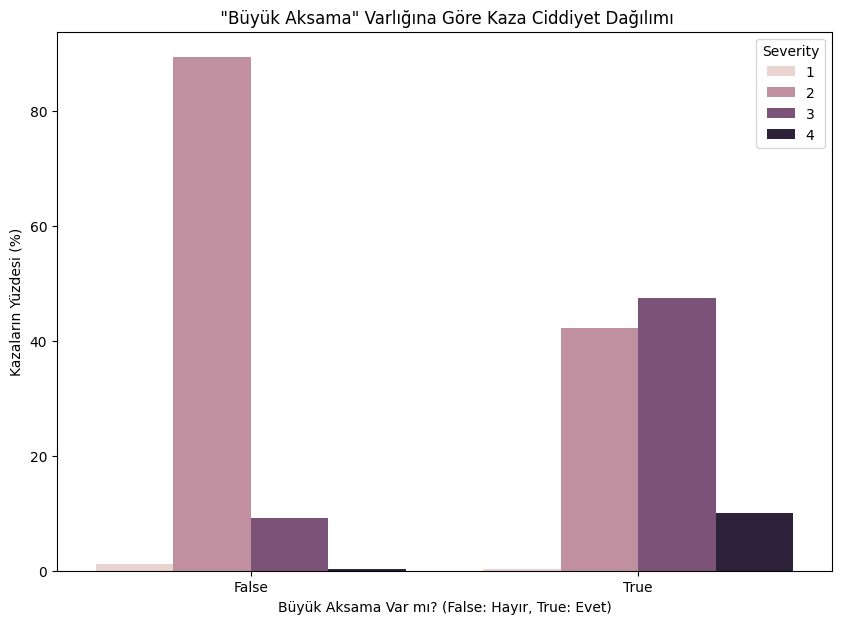

In [44]:
# "Is_Major_Disruption" Özelliğinin Etkisi 

# Yüzdesel dağılımı hesaplayalım
disruption_severity = df.groupby('Is_Major_Disruption')['Severity'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

# Grafiği çizelim
plt.figure(figsize=(10, 7))
sns.barplot(x='Is_Major_Disruption', y='percentage', hue='Severity', data=disruption_severity)
plt.title(' "Büyük Aksama" Varlığına Göre Kaza Ciddiyet Dağılımı')
plt.ylabel('Kazaların Yüzdesi (%)')
plt.xlabel('Büyük Aksama Var mı? (False: Hayır, True: Evet)')
plt.show()

   !!!!!!!! Deney A (Çoklu Özellik Modeli): Modeli, daha önce tasarladığımız dört ayrı FEAT_ özelliğiyle eğitmek.

    Deney B (Birleşik Özellik Modeli): Modeli, bu yeni Is_Major_Disruption özelliği ve belki ek olarak FEAT_Is_Local_Slowdown ve FEAT_Is_Minor_Crash özellikleriyle eğitmek.!!!!!!!!

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# ADIM 0:VERİYİ YÜKLEME 
print("--- Ham veri yükleniyor... ---")
df = pd.read_csv('usa_acc.csv') 

# ADIM 1: ÖRNEKLEME VE İLK AYIRMA 
print("--- Adım 1: Veri Örnekleniyor ve Eğitim/Test Olarak Bölünüyor ---")
df_sample = df.sample(n=500000, random_state=37)
del df

X = df_sample.drop('Severity', axis=1)
y = df_sample['Severity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=37, stratify=y
)
print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")


# ADIM 2: KAPSAMLI ÖZELLİK MÜHENDİSLİĞİ FONKSİYONU
def feature_engineer_final(df_input):
    df = df_input.copy()

    # YENİ EKLEME 1: ŞEHİR BAZLI SICAKLIK DOLDURMA 
    # Bu adım, 'City' sütunu silinmeden ÖNCE yapılmalıdır.
    if 'City' in df.columns and 'Temperature(F)' in df.columns:
        city_median_temps = df.groupby('City')['Temperature(F)'].transform('median')
        df['Temperature(F)'].fillna(city_median_temps, inplace=True)

    # 2A: GERÇEKTEN GEREKSİZ SÜTUNLARI SİLME
    # 'City' sütunu yukarıda kullanıldığı için artık güvenle silinebilir.
    cols_to_drop = [
        'ID', 'Source', 'End_Lat', 'End_Lng', 'City', 'County',
        'Zipcode', 'Country', 'Timezone', 'Airport_Code',
        'Weather_Timestamp', 'Wind_Chill(F)'
    ]
    df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

    # 2B: ZAMANSAL ÖZELLİKLER
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
    df['Hour'] = df['Start_Time'].dt.hour
    df['DayOfWeek'] = df['Start_Time'].dt.day_name()
    df['Is_Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])
    df['Is_Rush_Hour'] = df['Hour'].isin([7, 8, 9, 15, 16, 17, 18])
    
    df['Duration(min)'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60
    df.loc[df['Duration(min)'] < 0, 'Duration(min)'] = 0
    df.drop(['Start_Time', 'End_Time'], axis=1, inplace=True)
    
    # 2C: YAĞIŞ ÖZELLİĞİ (Precipitation)
    if 'Precipitation(in)' in df.columns:
        df['Precipitation(in)'].fillna(0.0, inplace=True)
        df['Was_Precipitation'] = df['Precipitation(in)'] > 0.0
        df.drop(columns=['Precipitation(in)'], inplace=True)

    # 2D: YOL TİPİ ÖZELLİĞİ (Street)
    if 'Street' in df.columns:
        df['Street'].fillna('Unknown', inplace=True)
        highway_keywords = ['Hwy', 'Fwy', 'Pkwy', 'Expy', 'Blvd', 'Highway', 'Freeway', 'Parkway', 'Expressway', 'I-', 'US-', 'SR-']
        df['Road_Type'] = df['Street'].apply(lambda x: 'Highway/Main_Road' if any(kw in str(x) for kw in highway_keywords) else 'Local_Street')
        
        # DÜŞÜK HIZ BÖLGESİ ÖZELLİĞİ 
        low_speed_keywords = ['St', 'Dr', 'Ave', 'Rd', 'Ln', 'Ct', 'Pl']
        pattern = r'\b(' + '|'.join(low_speed_keywords) + r')\b'
        df['Is_Low_Speed_Zone'] = df['Street'].str.contains(pattern, case=False, na=False)
        
        df.drop(columns=['Street'], inplace=True)
    
    # 2E: 'DESCRIPTION'DAN SÜPER ÖZELLİKLER
    if 'Description' in df.columns:
        desc_lower = df['Description'].str.lower().fillna('')
        df['FEAT_Is_Road_Closed'] = desc_lower.str.contains('closed|closure|alternate route', na=False)
        df['FEAT_Is_Lane_Blocked_On_Highway'] = desc_lower.str.contains('blocked|lane', na=False) & \
                                               desc_lower.str.contains('northbound|southbound|eastbound|westbound', na=False)
        df['FEAT_Is_Local_Slowdown'] = desc_lower.str.contains('traffic|slow|caution|stationary', na=False)
        df['FEAT_Is_Minor_Crash'] = desc_lower.str.contains('crash', na=False)
        df.drop(columns=['Description'], inplace=True, errors='ignore')

    # 2F: Diğer Süper Özellikler
    df['Is_Stop_and_Go_Traffic'] = (df['Is_Rush_Hour'] == True) & ((df['Traffic_Signal'] == True) | (df['Stop'] == True))
    
    if 'Road_Type' in df.columns:
        df['Is_High_Energy_Zone'] = (df['Road_Type'] == 'Highway/Main_Road') & (df['Junction'] == True)
        
    df['Is_Night_Weekend'] = (df['Is_Weekend'] == True) & (df['Hour'].isin(list(range(0, 5)) + [21, 22, 23]))

    # HAVA DURUMU ÖZELLİKLERİNİ BİRLEŞTİRME 
    if 'Weather_Condition' in df.columns:
        df['Weather_Condition'].fillna('Unknown', inplace=True)
        bad_weather_keywords = ['rain', 'snow', 'storm', 'thunder', 'fog', 'ice', 'sleet', 'wintry', 'drizzle', 'hail']
        df['Bad_Weather'] = df['Weather_Condition'].str.lower().str.contains('|'.join(bad_weather_keywords), na=False)
        df.drop(columns=['Weather_Condition'], inplace=True)
        
    #  YÜKSEK ENERJİLİ KAZA ÖZELLİĞİ
    if 'Distance(mi)' in df.columns and 'Duration(min)' in df.columns:
        dist_threshold = df['Distance(mi)'].quantile(0.75)
        dura_threshold = df['Duration(min)'].quantile(0.75)
        df['Is_High_Energy_Accident'] = (df['Distance(mi)'] > dist_threshold) & (df['Duration(min)'] > dura_threshold)

    return df

print("\n--- Adım 2: Kapsamlı Özellik Mühendisliği Uygulanıyor ---")
X_train_featured = feature_engineer_final(X_train)
X_test_featured = feature_engineer_final(X_test)
print("Kapsamlı özellik mühendisliği tamamlandı.")
print(f"Yeni özellik setinin boyutu: {X_train_featured.shape}")


# ADIM 3: AYKIRI DEĞERLER (Clipping) 
print("\n--- Adım 3: Aykırı Değerler Temizleniyor ---")
clipping_bounds = {}
cols_to_clip = [col for col in ['Temperature(F)', 'Wind_Speed(mph)', 'Distance(mi)', 'Duration(min)', 'Pressure(in)', 'Humidity(%)', 'Visibility(mi)'] if col in X_train_featured.columns]
for col in cols_to_clip:
    lower = X_train_featured[col].quantile(0.01)
    upper = X_train_featured[col].quantile(0.99)
    clipping_bounds[col] = (lower, upper)
    
    X_train_featured[col] = X_train_featured[col].clip(lower=lower, upper=upper)
    X_test_featured[col] = X_test_featured[col].clip(lower=lower, upper=upper)
print("Aykırı değer temizliği tamamlandı.")


# ADIM 4: EKSİK VERİ DOLDURMA 
print("\n--- Adım 4: Eksik Veriler Dolduruluyor ---")
fill_values = {}
for col in X_train_featured.columns:
    if X_train_featured[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(X_train_featured[col]):
            fill_values[col] = X_train_featured[col].median()
        else:
            fill_values[col] = X_train_featured[col].mode()[0]

X_train_featured.fillna(value=fill_values, inplace=True)
X_test_featured.fillna(value=fill_values, inplace=True)
print("Eksik veri doldurma tamamlandı. Kalan eksik veri:", X_train_featured.isnull().sum().sum())

print("\nVeri hazırlama işlemi başarıyla tamamlandı.")

--- Ham veri yükleniyor... ---
--- Adım 1: Veri Örnekleniyor ve Eğitim/Test Olarak Bölünüyor ---
Eğitim seti boyutu: (400000, 45)
Test seti boyutu: (100000, 45)

--- Adım 2: Kapsamlı Özellik Mühendisliği Uygulanıyor ---
Kapsamlı özellik mühendisliği tamamlandı.
Yeni özellik setinin boyutu: (400000, 44)

--- Adım 3: Aykırı Değerler Temizleniyor ---
Aykırı değer temizliği tamamlandı.

--- Adım 4: Eksik Veriler Dolduruluyor ---
Eksik veri doldurma tamamlandı. Kalan eksik veri: 0

Veri hazırlama işlemi başarıyla tamamlandı.


In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
import time
import pandas as pd

# DEĞERLENDİRME FONKSİYONU
def train_evaluate_and_report(model, X_train, y_train, X_test, y_test, experiment_name):
    """Bir modeli eğitir, değerlendirir ve sonuçları bir dictionary olarak döndürür."""
    print("\n" + "="*40)
    print(f"MODEL EĞİTİMİ BAŞLIYOR: {experiment_name}")
    print("="*40)
    
    # 1. KATEGORİK VERİLERİ KODLAMA (OHE)
    # Sadece 'object' tipindeki sütunları seçelim.
    categorical_cols = X_train.select_dtypes(include='object').columns
    
    # handle_unknown='ignore', test setinde eğitim setinde olmayan bir kategoriyle karşılaşırsa hata vermemesini sağlar.
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    # OHE'yi SADECE eğitim setinden öğren
    encoder.fit(X_train[categorical_cols])
    
    # Öğrenilen kodlayıcıyı hem eğitim hem de test setine uygula
    X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_cols]), index=X_train.index)
    X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), index=X_test.index)
    
    # Sütun isimlerini yeniden oluşturalım (daha okunaklı)
    X_train_encoded.columns = encoder.get_feature_names_out(categorical_cols)
    X_test_encoded.columns = encoder.get_feature_names_out(categorical_cols)
    
    # Orijinal kategorik sütunları atıp, kodlanmış olanları ekleyelim
    X_train_processed = X_train.drop(columns=categorical_cols).join(X_train_encoded)
    X_test_processed = X_test.drop(columns=categorical_cols).join(X_test_encoded)
    
    # Sütun adlarındaki özel karakterleri temizleyelim (XGBoost uyumluluğu için)
    X_train_processed.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train_processed.columns]
    X_test_processed.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test_processed.columns]
    
    print(f"One-Hot Encoding sonrası özellik sayısı: {X_train_processed.shape[1]}")
    
    # 2. SMOTE (Sadece Eğitim Verisine)
    print("\nSMOTE uygulanıyor...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)
    
    # 3. ÖZELLİK ÖLÇEKLENDİRME
    print("Özellik ölçeklendirme uygulanıyor...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test_processed) # Test setinde sadece transform
    
    # 4. MODEL EĞİTİMİ VE DEĞERLENDİRME
    print(f"\nXGBoost modeli eğitiliyor...")
    start_time = time.time()
    model.fit(X_train_scaled, y_train_resampled)
    end_time = time.time()
    
    y_pred = model.predict(X_test_scaled)
    
    # 5. SONUÇLARI KAYDETME
    training_time = end_time - start_time
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    report_str = classification_report(y_test, y_pred)
    
    print(f"\n--- {experiment_name} SONUÇLARI ---")
    print(report_str)
    print(f"Macro F1-Skoru: {macro_f1:.4f}")
    print(f"Eğitim Süresi: {training_time:.2f} saniye")
    
    return {
        'Deney Adı': experiment_name,
        'Macro F1-Skoru': macro_f1,
        'Eğitim Süresi (sn)': training_time,
        'Detaylı Rapor': report_str
    }

# MODEL EĞİTİMİ

# XGBoost modelini oluştur
xgb_model = XGBClassifier(random_state=42, n_jobs=-1)

# Hedef değişkeni (y) 0-indeksli yapalım
y_train_final = y_train - 1
y_test_final = y_test - 1

# Modeli eğit ve değerlendir
result = train_evaluate_and_report(
    xgb_model, X_train_featured, y_train_final, X_test_featured, y_test_final, 
    'XGBoost Model Eğitimi ve Değerlendirme'
)

print("\n" + "="*60)
print("MODEL EĞİTİMİ TAMAMLANDI")
print("="*60)


MODEL EĞİTİMİ BAŞLIYOR: XGBoost Model Eğitimi ve Değerlendirme
One-Hot Encoding sonrası özellik sayısı: 126

SMOTE uygulanıyor...
Özellik ölçeklendirme uygulanıyor...

XGBoost modeli eğitiliyor...

--- XGBoost Model Eğitimi ve Değerlendirme SONUÇLARI ---
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       884
           1       0.92      0.93      0.93     79642
           2       0.72      0.66      0.69     16800
           3       0.65      0.62      0.64      2674

    accuracy                           0.88    100000
   macro avg       0.72      0.71      0.71    100000
weighted avg       0.88      0.88      0.88    100000

Macro F1-Skoru: 0.7139
Eğitim Süresi: 54.42 saniye

MODEL EĞİTİMİ TAMAMLANDI


--- Tam veri seti yükleniyor... ---
Veri seti başarıyla yüklendi.

--- 1. Analiz: En Yoğun 10 Eyalette Aylık Kaza Dağılımı ---


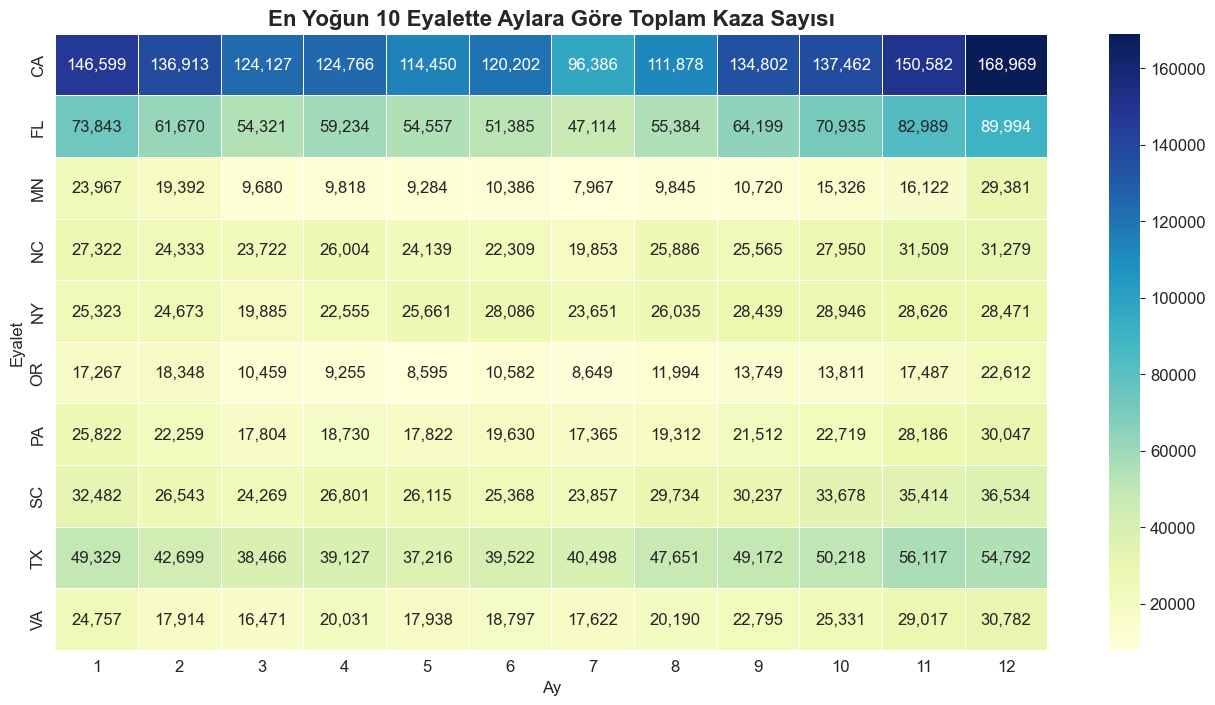


--- 2. Analiz: Eyalet, Ay ve Saate Göre Ortalama Kaza Şiddeti ---


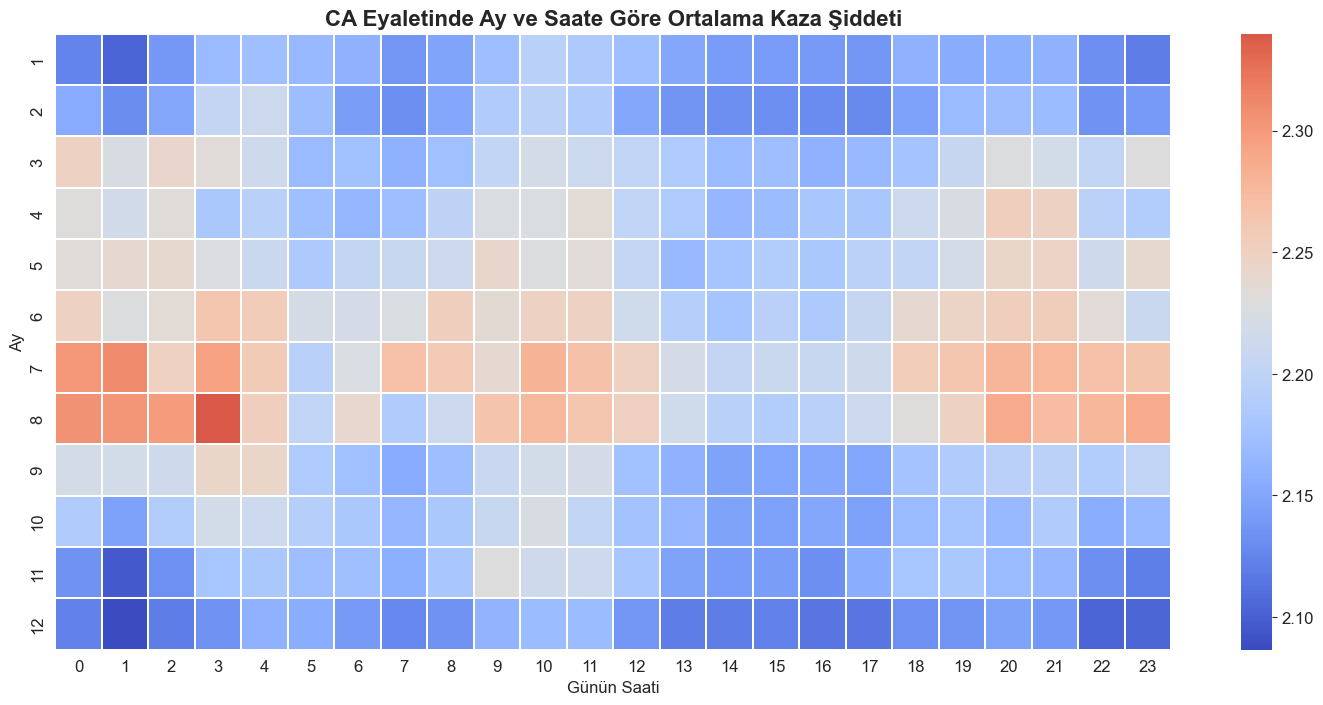

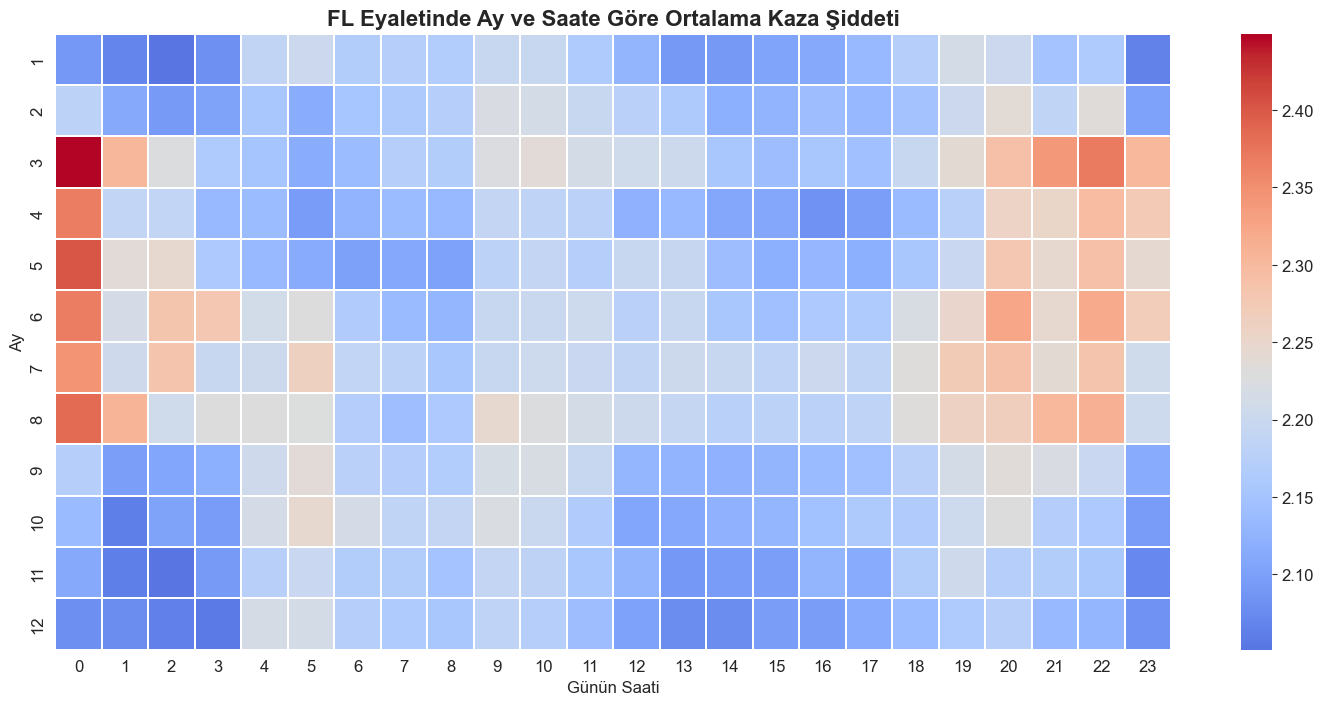

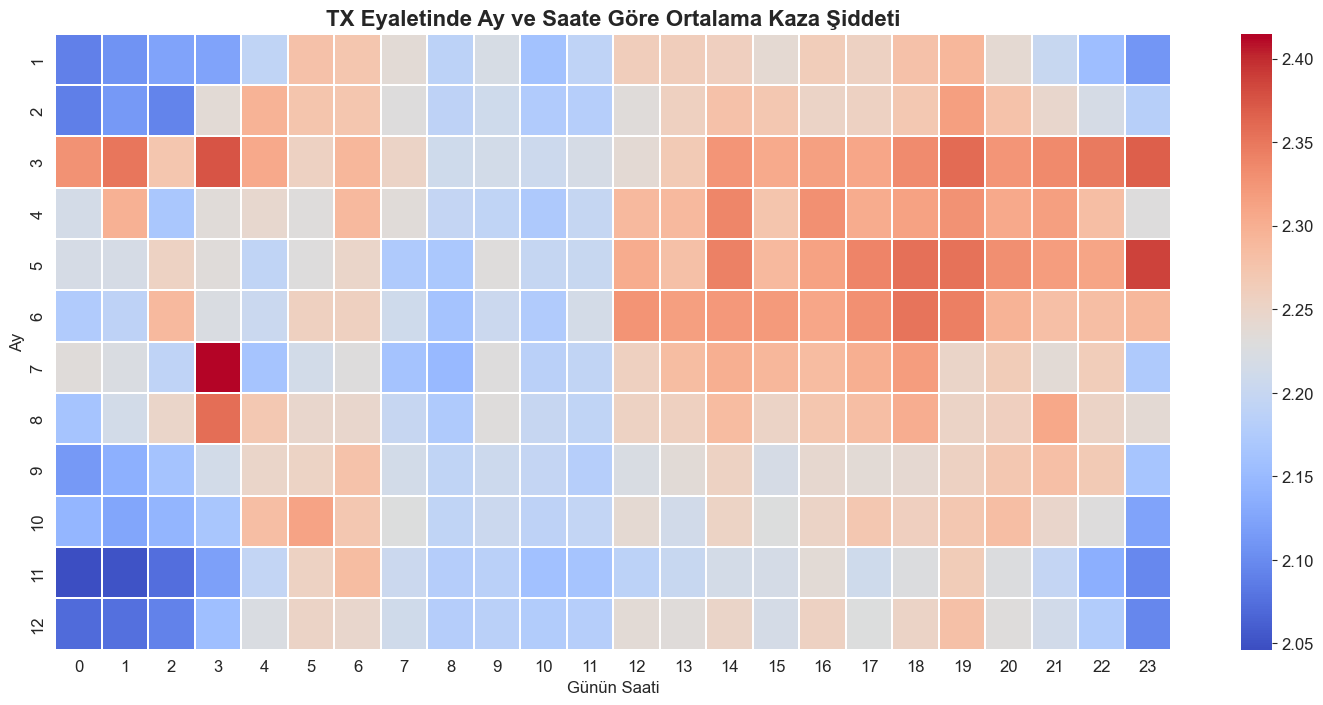


--- 3. Analiz: Kış Aylarının Kaza Yoğunluğu ve Şiddetine Etkisi ---


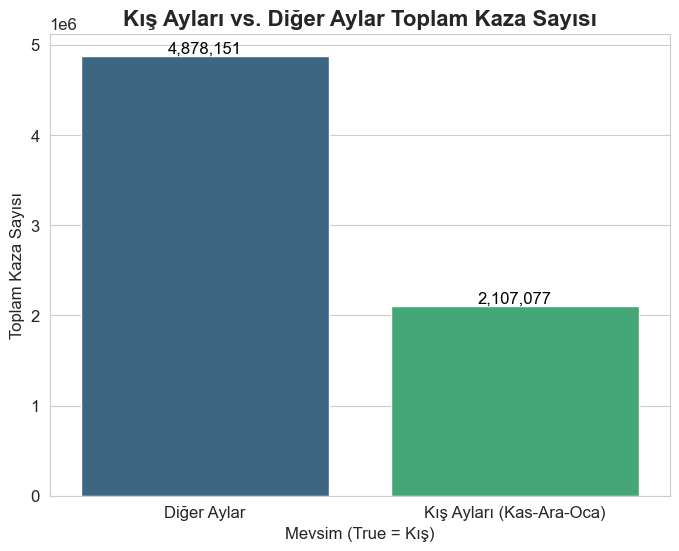

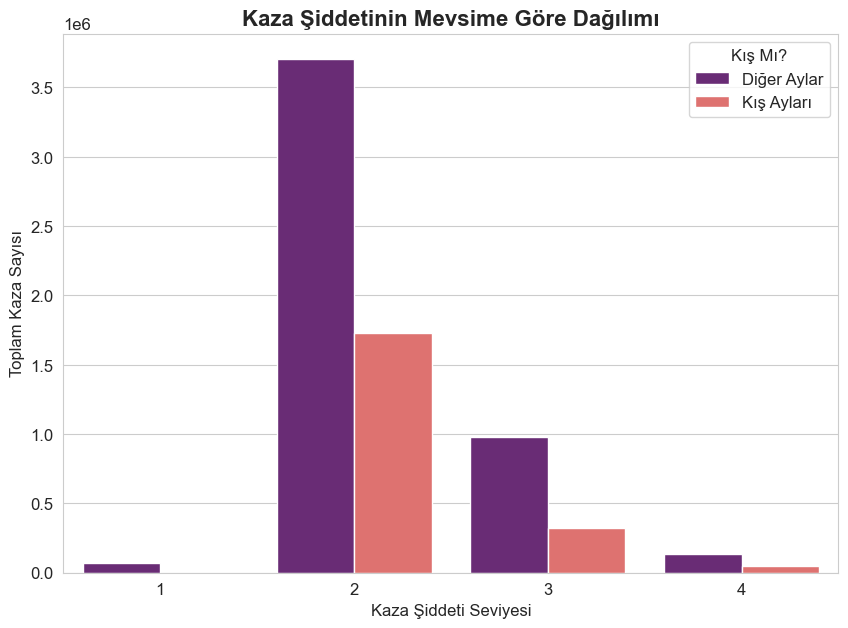

Mevsime Göre Ortalama Kaza Şiddeti:
is_winter
False    2.240779
True     2.202552
Name: Severity, dtype: float64


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Grafik Ayarları 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

#  ADIM 0: HAM VERİYİ YÜKLEME VE HAZIRLAMA 
print("--- Tam veri seti yükleniyor... ---")
try:
    # parse_dates parametresini burada kullanmak yerine, sonradan kendimiz dönüştüreceğiz.
    df = pd.read_csv('usa_acc.csv')
    print("Veri seti başarıyla yüklendi.")
    
    # 'Start_Time' SÜTUNUNU GARANTİLİ DÖNÜŞTÜRME 
    # errors='coerce' parametresi, formatı bozuk tarihleri hataya neden olmadan NaT yapar.
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    
    # Tarih formatına dönüştürülemeyen (varsa) satırları temizleyelim.
    df.dropna(subset=['Start_Time'], inplace=True)
    
except FileNotFoundError:
    print("HATA: 'usacc.csv' dosyası bulunamadı. Lütfen dosyanın doğru dizinde olduğundan emin olun.")
    df = pd.DataFrame()

if not df.empty:
    # --- Zaman Özelliklerini Oluşturma ---
    # Artık bu satırlar sorunsuz çalışacak.
    df['Month'] = df['Start_Time'].dt.month
    df['Hour'] = df['Start_Time'].dt.hour
    df['DayOfWeek'] = df['Start_Time'].dt.day_name()

    top_10_states = df['State'].value_counts().nlargest(10).index

    # === 1. ANALİZ: Eyaletlere Göre Aylık Kaza Dağılımı ===
    print("\n--- 1. Analiz: En Yoğun 10 Eyalette Aylık Kaza Dağılımı ---")
    
    df_top_states = df[df['State'].isin(top_10_states)]
    monthly_accidents_pivot = df_top_states.pivot_table(index='State', columns='Month', aggfunc='size', fill_value=0)
    
    plt.figure(figsize=(16, 8))
    sns.heatmap(monthly_accidents_pivot, cmap='YlGnBu', annot=True, fmt=',.0f', linewidths=.5)
    plt.title('En Yoğun 10 Eyalette Aylara Göre Toplam Kaza Sayısı', fontsize=16, fontweight='bold')
    plt.xlabel('Ay')
    plt.ylabel('Eyalet')
    plt.show()

    # === 2. ANALİZ: Eyalet - Ay - Saat Bazında Ortalama Kaza Şiddeti 
    print("\n--- 2. Analiz: Eyalet, Ay ve Saate Göre Ortalama Kaza Şiddeti ---")
    
    top_3_states = top_10_states[:3]
    
    for state in top_3_states:
        df_state = df[df['State'] == state]
        severity_pivot = df_state.pivot_table(index='Month', columns='Hour', values='Severity', aggfunc='mean')
        
        plt.figure(figsize=(18, 8))
        sns.heatmap(severity_pivot, cmap='coolwarm', center=df['Severity'].mean(), linewidths=.1)
        plt.title(f'{state} Eyaletinde Ay ve Saate Göre Ortalama Kaza Şiddeti', fontsize=16, fontweight='bold')
        plt.xlabel('Günün Saati')
        plt.ylabel('Ay')
        plt.show()

    # === 3. ANALİZ ve YENİ ÖZELLİK: 'is_winter' Özelliği ve Etkisi ===
    print("\n--- 3. Analiz: Kış Aylarının Kaza Yoğunluğu ve Şiddetine Etkisi ---")
    
    winter_months = [11, 12, 1]
    df['is_winter'] = df['Month'].isin(winter_months)
    
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='is_winter', data=df, palette='viridis')
    plt.title('Kış Ayları vs. Diğer Aylar Toplam Kaza Sayısı', fontsize=16, fontweight='bold')
    plt.xlabel('Mevsim (True = Kış)')
    plt.ylabel('Toplam Kaza Sayısı')
    ax.set_xticklabels(['Diğer Aylar', 'Kış Ayları (Kas-Ara-Oca)'])
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()
    
    plt.figure(figsize=(10, 7))
    sns.countplot(x='Severity', hue='is_winter', data=df, palette='magma')
    plt.title('Kaza Şiddetinin Mevsime Göre Dağılımı', fontsize=16, fontweight='bold')
    plt.xlabel('Kaza Şiddeti Seviyesi')
    plt.ylabel('Toplam Kaza Sayısı')
    plt.legend(title='Kış Mı?', labels=['Diğer Aylar', 'Kış Ayları'])
    plt.show()
    
    avg_severity_winter = df.groupby('is_winter')['Severity'].mean()
    print("Mevsime Göre Ortalama Kaza Şiddeti:")
    print(avg_severity_winter)

Toplam kış kazası sayısı: 2,107,077


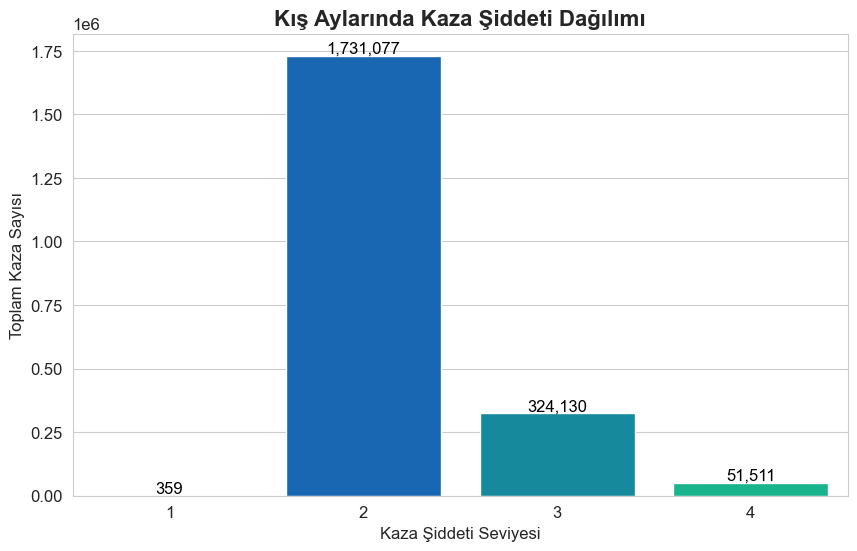


Kış Aylarındaki Kazaların Yüzdesel Şiddet Dağılımı:
Severity
1     0.02
2    82.16
3    15.38
4     2.44


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Grafik Ayarları ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Veriyi Hazırlama (Eğer daha önce çalıştırılmadıysa) 
# df = pd.read_csv('usacc.csv')
# df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
# df.dropna(subset=['Start_Time'], inplace=True)
# df['Month'] = df['Start_Time'].dt.month
# df['is_winter'] = df['Month'].isin([11, 12, 1])

# === Sadece Kış Aylarını İçeren Veri Setini Filtreleme ===
df_winter = df[df['is_winter'] == True].copy()

print(f"Toplam kış kazası sayısı: {len(df_winter):,.0f}")

# === Kış Aylarındaki Şiddet Dağılımını Çizdirme ===
plt.figure()
ax = sns.countplot(x='Severity', data=df_winter, palette='winter', order=[1, 2, 3, 4])
plt.title('Kış Aylarında Kaza Şiddeti Dağılımı', fontsize=16, fontweight='bold')
plt.xlabel('Kaza Şiddeti Seviyesi')
plt.ylabel('Toplam Kaza Sayısı')

# Her çubuğun üzerine toplam sayıyı yazdıralım
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

# === Yüzdesel Dağılımı da Görelim ===
winter_severity_percentage = df_winter['Severity'].value_counts(normalize=True).sort_index() * 100
print("\nKış Aylarındaki Kazaların Yüzdesel Şiddet Dağılımı:")
print(winter_severity_percentage.round(2).to_string())

Her Şiddet Seviyesinin Kendi İçindeki Mevsimsel Dağılımı (%):
          Diğer Aylar %  Kış Ayları %
Severity                             
1                 99.47          0.53
2                 68.14         31.86
3                 75.05         24.95
4                 72.12         27.88


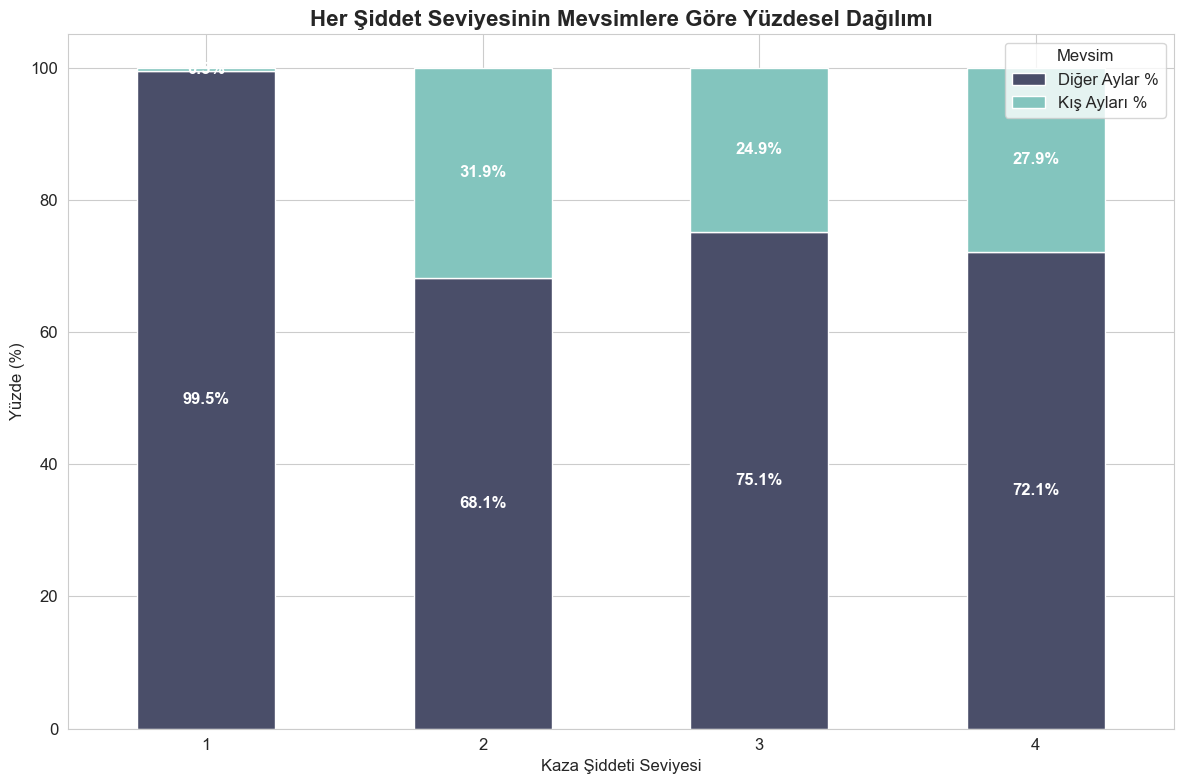

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Grafik Ayarları ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

# --- Veriyi Hazırlama (Eğer daha önce çalıştırılmadıysa) ---
# df = pd.read_csv('usacc.csv')
# df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
# df.dropna(subset=['Start_Time'], inplace=True)
# df['Month'] = df['Start_Time'].dt.month
# df['is_winter'] = df['Month'].isin([11, 12, 1])

# === Veriyi Hazırlama: Her şiddet seviyesi için yüzdeleri hesaplama ===

# 'crosstab' fonksiyonu bu iş için mükemmeldir. 
# Her şiddet seviyesinin ne kadarının kış/diğer aylar olduğunu sayar.
# normalize='index' parametresi, her satırın (yani her şiddet seviyesinin) toplamını %100 yapar.
severity_season_crosstab = pd.crosstab(index=df['Severity'], 
                                       columns=df['is_winter'], 
                                       normalize='index') * 100

# Sütunları daha anlaşılır isimlendirelim
severity_season_crosstab.columns = ['Diğer Aylar %', 'Kış Ayları %']

print("Her Şiddet Seviyesinin Kendi İçindeki Mevsimsel Dağılımı (%):")
print(severity_season_crosstab.round(2))

# === Grafiği Çizdirme (Stacked Bar Chart) ===
# Yığılmış çubuk grafik, %100'lük dağılımı göstermek için en iyi yöntemdir.
ax = severity_season_crosstab.plot(kind='bar', 
                                   stacked=True, 
                                   figsize=(12, 8),
                                   color=['#4a4e69', '#83c5be']) # Mor ve Nane Yeşili tonları

# Başlık ve etiketler
plt.title('Her Şiddet Seviyesinin Mevsimlere Göre Yüzdesel Dağılımı', fontsize=16, fontweight='bold')
plt.xlabel('Kaza Şiddeti Seviyesi')
plt.ylabel('Yüzde (%)')
plt.xticks(rotation=0) # Eksen etiketlerini düz yap
plt.legend(title='Mevsim', loc='upper right')

# Barların üzerine yüzdeleri yazdırma
for c in ax.containers:
    # Sadece etiket boş değilse yazdır
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

--- Veri yükleniyor ve hazırlanıyor... ---
Temel özellikler oluşturuldu.
Etkileşim özellikleri oluşturuldu.


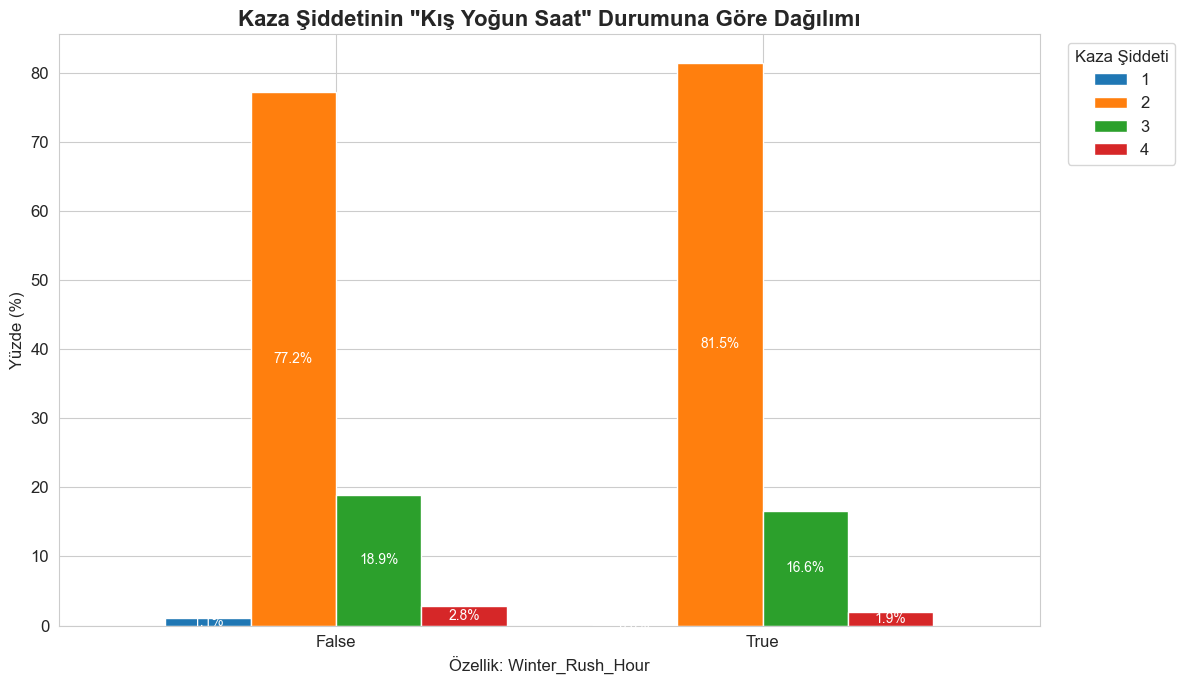

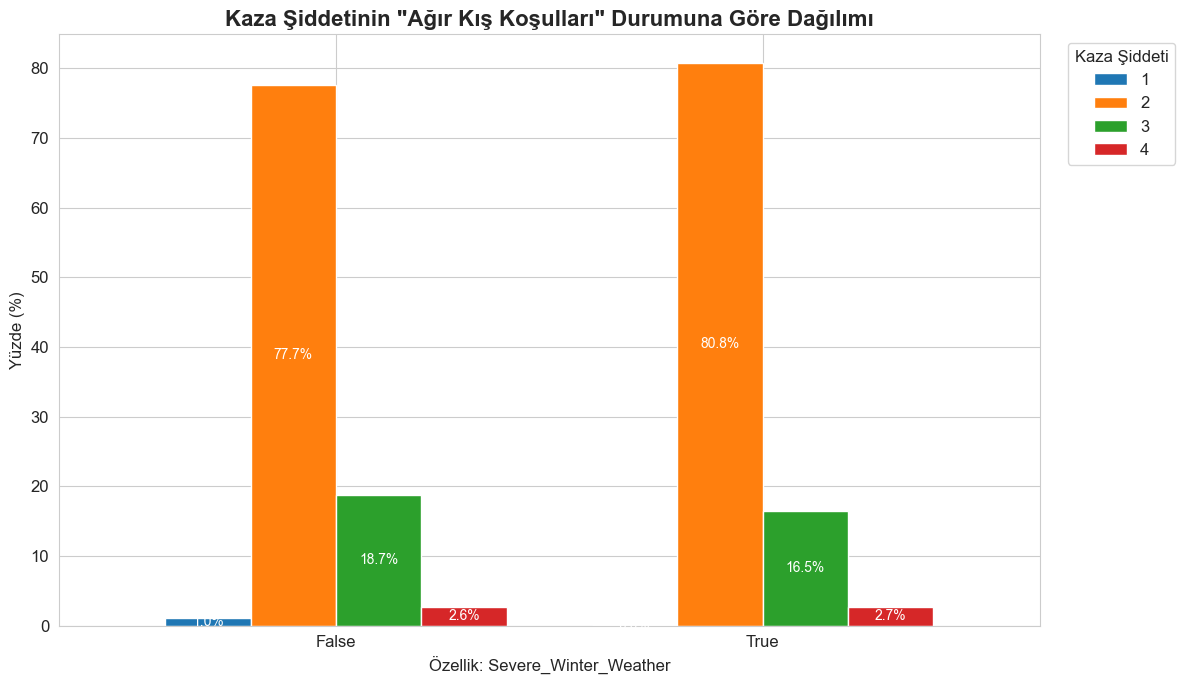

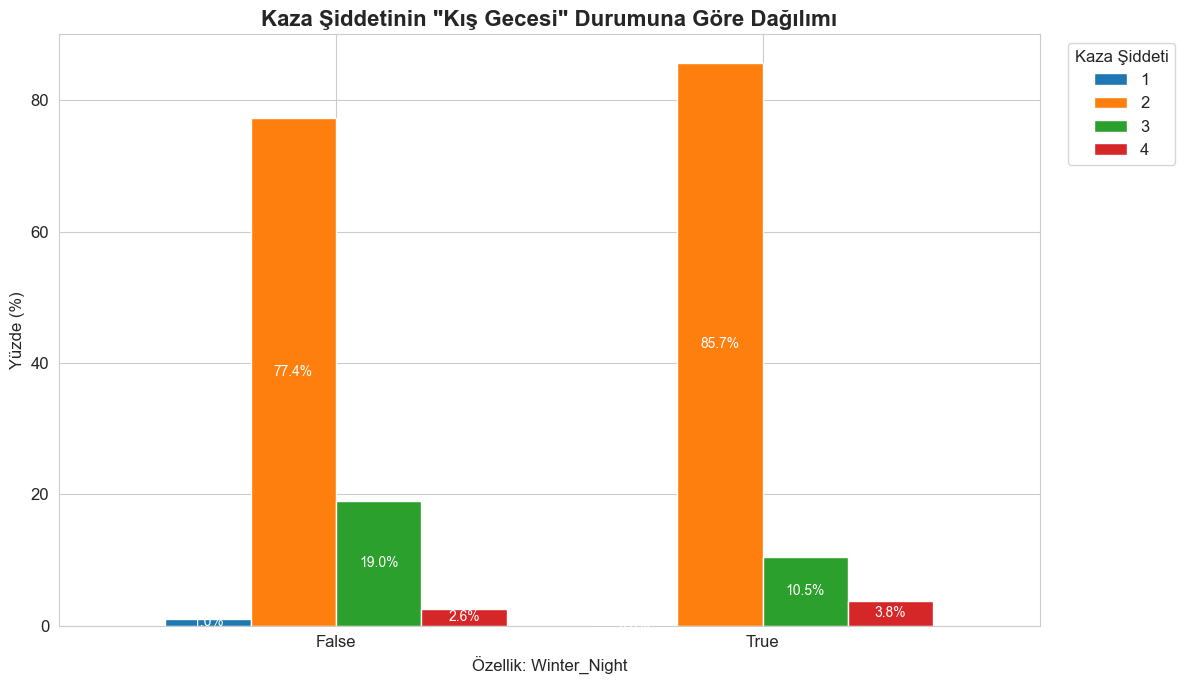

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Grafik Ayarları ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# --- ADIM 0: Veriyi Yükle ve Analiz İçin Gerekli Temel Özellikleri Oluştur ---
print("--- Veri yükleniyor ve hazırlanıyor... ---")
try:
    df = pd.read_csv('usa_acc.csv')
    # Gerekli temel özellikleri oluşturma (hata kontrolü ile)
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    df.dropna(subset=['Start_Time'], inplace=True)
    
    df['Month'] = df['Start_Time'].dt.month
    df['Hour'] = df['Start_Time'].dt.hour
    df['Is_Rush_Hour'] = df['Hour'].isin([7, 8, 9, 15, 16, 17, 18])
    
    if 'Weather_Condition' in df.columns:
        df['Weather_Condition'].fillna('Unknown', inplace=True)
        bad_weather_keywords = ['rain', 'snow', 'storm', 'thunder', 'fog', 'ice', 'sleet', 'wintry', 'drizzle', 'hail']
        df['Bad_Weather'] = df['Weather_Condition'].str.lower().str.contains('|'.join(bad_weather_keywords), na=False)
    else:
        df['Bad_Weather'] = False # Sütun yoksa varsayılan olarak False ata

    df['is_winter'] = df['Month'].isin([11, 12, 1])
    print("Temel özellikler oluşturuldu.")

except FileNotFoundError:
    print("HATA: 'usacc.csv' dosyası bulunamadı.")
    df = pd.DataFrame()

if not df.empty:
    # --- ADIM 1: Yeni Etkileşim Özelliklerini Oluşturma ---
    df['Winter_Rush_Hour'] = (df['is_winter'] == True) & (df['Is_Rush_Hour'] == True)
    df['Severe_Winter_Weather'] = (df['is_winter'] == True) & (df['Bad_Weather'] == True)
    night_hours = [22, 23, 0, 1, 2, 3, 4, 5]
    df['Winter_Night'] = (df['is_winter'] == True) & (df['Hour'].isin(night_hours))
    print("Etkileşim özellikleri oluşturuldu.")

    # --- ADIM 2: Her Özellik İçin Karşılaştırmalı Grafikler Çizdirme ---
    
    # Bu işi tekrar tekrar yapacağımız için bir fonksiyon yazalım
    def plot_interaction_effect(dataframe, feature_name, title):
        """
        Belirtilen özelliğin True/False durumlarına göre kaza şiddetinin 
        yüzdesel dağılımını çizen bir fonksiyon.
        """
        # Her durum (True/False) için şiddet dağılımını yüzde olarak hesapla
        crosstab = pd.crosstab(index=dataframe[feature_name], 
                               columns=dataframe['Severity'], 
                               normalize='index') * 100
        
        # Grafiği çizdir
        ax = crosstab.plot(kind='bar', figsize=(12, 7), width=0.8)
        
        plt.title(title, fontsize=16, fontweight='bold')
        plt.ylabel('Yüzde (%)')
        plt.xlabel(f'Özellik: {feature_name}')
        plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
        plt.legend(title='Kaza Şiddeti', bbox_to_anchor=(1.02, 1), loc='upper left')
        
        # Her barın üzerine yüzdesini yazdır
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='center', color='white', fontsize=10)
            
        plt.tight_layout()
        plt.show()

    # Oluşturduğumuz her bir etkileşim özelliği için fonksiyonu çağıralım
    plot_interaction_effect(df, 
                            'Winter_Rush_Hour', 
                            'Kaza Şiddetinin "Kış Yoğun Saat" Durumuna Göre Dağılımı')

    plot_interaction_effect(df, 
                            'Severe_Winter_Weather', 
                            'Kaza Şiddetinin "Ağır Kış Koşulları" Durumuna Göre Dağılımı')

    plot_interaction_effect(df, 
                            'Winter_Night', 
                            'Kaza Şiddetinin "Kış Gecesi" Durumuna Göre Dağılımı')

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#  ADIM 0: HAM VERİYİ YÜKLEME 
print("--- Ham veri yükleniyor... ---")
df = pd.read_csv('usa_acc.csv') 

# ADIM 1: ÖRNEKLEME VE İLK AYIRMA 
print("--- Adım 1: Veri Örnekleniyor ve Eğitim/Test Olarak Bölünüyor ---")
df_sample = df.sample(n=1000000, random_state=42)
del df

X = df_sample.drop('Severity', axis=1)
y = df_sample['Severity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")


#  ADIM 2: KAPSAMLI ÖZELLİK MÜHENDİSLİĞİ FONKSİYONU 
def feature_engineer_final(df_input):
    df = df_input.copy()
    
    # GEREKSİZ SÜTUNLARI SİLME
    cols_to_drop = [
        'ID', 'Source', 'End_Lat', 'End_Lng', 'City', 'County', 
        'Zipcode', 'Country', 'Timezone', 'Airport_Code', 
        'Weather_Timestamp', 'Wind_Chill(F)'
    ]
    df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
    
    # ZAMANSAL ÖZELLİKLER
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
    
    df['Month'] = df['Start_Time'].dt.month
    df['Hour'] = df['Start_Time'].dt.hour
    
    df['DayOfWeek'] = df['Start_Time'].dt.day_name()
    df['Is_Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])
    df['Is_Rush_Hour'] = df['Hour'].isin([7, 8, 9, 15, 16, 17, 18])
    
    df['Duration(min)'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60
    df.loc[df['Duration(min)'] < 0, 'Duration(min)'] = 0
    df.drop(['Start_Time', 'End_Time'], axis=1, inplace=True)
    
    # YAĞIŞ ÖZELLİĞİ
    if 'Precipitation(in)' in df.columns:
        df['Precipitation(in)'].fillna(0.0, inplace=True)
        df['Was_Precipitation'] = df['Precipitation(in)'] > 0.0
        df.drop(columns=['Precipitation(in)'], inplace=True)

    # YOL TİPİ ÖZELLİĞİ
    if 'Street' in df.columns:
        df['Street'].fillna('Unknown', inplace=True)
        highway_keywords = ['Hwy', 'Fwy', 'Pkwy', 'Expy', 'Blvd', 'Highway', 'Freeway', 'Parkway', 'Expressway', 'I-', 'US-', 'SR-']
        df['Road_Type'] = df['Street'].apply(lambda x: 'Highway/Main_Road' if any(kw in str(x) for kw in highway_keywords) else 'Local_Street')
        df.drop(columns=['Street'], inplace=True)
    
    # DESCRIPTION'DAN ÖZELLİKLER
    if 'Description' in df.columns:
        desc_lower = df['Description'].str.lower().fillna('')
        df['FEAT_Is_Road_Closed'] = desc_lower.str.contains('closed|closure|alternate route', na=False)
        df['FEAT_Is_Lane_Blocked_On_Highway'] = desc_lower.str.contains('blocked|lane', na=False) & \
                                               desc_lower.str.contains('northbound|southbound|eastbound|westbound', na=False)
        df['FEAT_Is_Local_Slowdown'] = desc_lower.str.contains('traffic|slow|caution|stationary', na=False)
        df['FEAT_Is_Minor_Crash'] = desc_lower.str.contains('crash', na=False)
        df.drop(columns=['Description'], inplace=True, errors='ignore')

    # DİĞER SÜPER ÖZELLİKLER
    df['Is_Stop_and_Go_Traffic'] = (df['Is_Rush_Hour'] == True) & ((df['Traffic_Signal'] == True) | (df['Stop'] == True))
    if 'Road_Type' in df.columns:
        df['Is_High_Energy_Zone'] = (df['Road_Type'] == 'Highway/Main_Road') & (df['Junction'] == True)
    df['Is_Night_Weekend'] = (df['Is_Weekend'] == True) & (df['Hour'].isin(list(range(0, 5)) + [21, 22, 23]))

    # YENİ EKLENEN ÖZELLİK: 'Winter_Night' 
    # 1. 'is_winter' özelliğini oluştur
    winter_months = [11, 12, 1]
    df['is_winter'] = df['Month'].isin(winter_months)
    
    # 2. 'Winter_Night' etkileşim özelliğini oluştur
    night_hours = [22, 23, 0, 1, 2, 3, 4, 5]
    df['Winter_Night'] = (df['is_winter'] == True) & (df['Hour'].isin(night_hours))
    
    # 3. Artık 'Month' sütununa ihtiyacımız kalmadı, silebiliriz.
    df.drop(columns=['Month'], inplace=True)
    
    return df

print("\n--- Adım 2: Kapsamlı Özellik Mühendisliği Uygulanıyor ---")
X_train_featured = feature_engineer_final(X_train)
X_test_featured = feature_engineer_final(X_test)
print("Kapsamlı özellik mühendisliği tamamlandı.")
print(f"Yeni özellik setinin boyutu: {X_train_featured.shape}")


#  ADIM 3: AYKIRI DEĞERLER (Clipping) 
print("\n--- Adım 3: Aykırı Değerler Temizleniyor ---")
clipping_bounds = {}
cols_to_clip = [col for col in ['Temperature(F)', 'Wind_Speed(mph)', 'Distance(mi)', 'Duration(min)', 'Pressure(in)', 'Humidity(%)', 'Visibility(mi)'] if col in X_train_featured.columns]
for col in cols_to_clip:
    lower = X_train_featured[col].quantile(0.01)
    upper = X_train_featured[col].quantile(0.99)
    clipping_bounds[col] = (lower, upper)
    
    X_train_featured[col] = X_train_featured[col].clip(lower=lower, upper=upper)
    X_test_featured[col] = X_test_featured[col].clip(lower=lower, upper=upper)
print("Aykırı değer temizliği tamamlandı.")


#  ADIM 4: EKSİK VERİ DOLDURMA 
print("\n--- Adım 4: Eksik Veriler Dolduruluyor ---")
fill_values = {}
for col in X_train_featured.columns:
    if X_train_featured[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(X_train_featured[col]):
            fill_values[col] = X_train_featured[col].median()
        else:
            fill_values[col] = X_train_featured[col].mode()[0]

X_train_featured.fillna(value=fill_values, inplace=True)
X_test_featured.fillna(value=fill_values, inplace=True)
print("Eksik veri doldurma tamamlandı. Kalan eksik veri:", X_train_featured.isnull().sum().sum())


#  DENEY A ve B İÇİN AYRI ÖZELLİK SETLERİ OLUŞTURMA 
print("\n--- Deney A ve B için özellik setleri hazırlanıyor... ---")
X_train_A = X_train_featured.copy()
X_test_A = X_test_featured.copy()
print(f"Deney A için özellik sayısı: {X_train_A.shape[1]}")
X_train_B = X_train_featured.copy()
X_test_B = X_test_featured.copy()
X_train_B['Is_Major_Disruption'] = (X_train_B['FEAT_Is_Road_Closed'] == True) | (X_train_B['FEAT_Is_Lane_Blocked_On_Highway'] == True)
X_test_B['Is_Major_Disruption'] = (X_test_B['FEAT_Is_Road_Closed'] == True) | (X_test_B['FEAT_Is_Lane_Blocked_On_Highway'] == True)
X_train_B.drop(columns=['FEAT_Is_Road_Closed', 'FEAT_Is_Lane_Blocked_On_Highway'], inplace=True)
X_test_B.drop(columns=['FEAT_Is_Road_Closed', 'FEAT_Is_Lane_Blocked_On_Highway'], inplace=True)
print(f"Deney B için özellik sayısı: {X_train_B.shape[1]}")
print("\n Deney A ve Deney B için başarıyla hazırlandı.")

--- Ham veri yükleniyor... ---
--- Adım 1: Veri Örnekleniyor ve Eğitim/Test Olarak Bölünüyor ---
Eğitim seti boyutu: (800000, 45)
Test seti boyutu: (200000, 45)

--- Adım 2: Kapsamlı Özellik Mühendisliği Uygulanıyor ---
Kapsamlı özellik mühendisliği tamamlandı.
Yeni özellik setinin boyutu: (800000, 44)

--- Adım 3: Aykırı Değerler Temizleniyor ---
Aykırı değer temizliği tamamlandı.

--- Adım 4: Eksik Veriler Dolduruluyor ---
Eksik veri doldurma tamamlandı. Kalan eksik veri: 0

--- Deney A ve B için özellik setleri hazırlanıyor... ---
Deney A için özellik sayısı: 44
Deney B için özellik sayısı: 43

 Deney A ve Deney B için başarıyla hazırlandı.


In [52]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
import time
import pandas as pd

# --- DEĞERLENDİRME FONKSİYONU ---
def train_evaluate_and_report(model, X_train, y_train, X_test, y_test, experiment_name):
    """Bir modeli eğitir, değerlendirir ve sonuçları bir dictionary olarak döndürür."""
    print("\n" + "="*40)
    print(f"DENEY BAŞLIYOR: {experiment_name}")
    print("="*40)
    
    categorical_cols = X_train.select_dtypes(include='object').columns
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoder.fit(X_train[categorical_cols])
    
    X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_cols]), index=X_train.index)
    X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), index=X_test.index)
    
    X_train_encoded.columns = encoder.get_feature_names_out(categorical_cols)
    X_test_encoded.columns = encoder.get_feature_names_out(categorical_cols)
    
    X_train_processed = X_train.drop(columns=categorical_cols).join(X_train_encoded)
    X_test_processed = X_test.drop(columns=categorical_cols).join(X_test_encoded)
    
    X_train_processed.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train_processed.columns]
    X_test_processed.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test_processed.columns]
    
    print(f"One-Hot Encoding sonrası özellik sayısı: {X_train_processed.shape[1]}")
    
    print("\nSMOTE uygulanıyor...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)
    
    print("Özellik ölçeklendirme uygulanıyor...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test_processed)
    
    print(f"\nXGBoost modeli eğitiliyor...")
    start_time = time.time()
    model.fit(X_train_scaled, y_train_resampled)
    end_time = time.time()
    
    y_pred = model.predict(X_test_scaled)
    
    training_time = end_time - start_time
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    report_str = classification_report(y_test, y_pred)
    
    print(f"\n--- {experiment_name} SONUÇLARI ---")
    print(report_str)
    print(f"Eğitim Süresi: {training_time:.2f} saniye")
    
    return {
        'Deney Adı': experiment_name,
        'Macro F1-Skoru': macro_f1,
        'Eğitim Süresi (sn)': training_time,
        'Detaylı Rapor': report_str
    }

#  DENEYLERİ BAŞLATMA 
xgb_model_A = XGBClassifier(random_state=42, n_jobs=-1)
xgb_model_B = XGBClassifier(random_state=42, n_jobs=-1)

y_train_final = y_train - 1
y_test_final = y_test - 1

result_A = train_evaluate_and_report(
    xgb_model_A, X_train_A, y_train_final, X_test_A, y_test_final, 'Deney A: Dört Ayrı Özellik'
)

result_B = train_evaluate_and_report(
    xgb_model_B, X_train_B, y_train_final, X_test_B, y_test_final, 'Deney B: Birleşik "Major Disruption" Özelliği'
)

#  NİHAİ SONUÇLARI KARŞILAŞTIRMA 
print("\n" + "="*60)
print("TÜM DENEYLERİN KARŞILAŞTIRMALI SONUÇLARI")
print("="*60)
final_results_df = pd.DataFrame([
    {'Deney Adı': result_A['Deney Adı'], 
     'Macro F1-Skoru': result_A['Macro F1-Skoru'], 
     'Eğitim Süresi (sn)': result_A['Eğitim Süresi (sn)']},
    {'Deney Adı': result_B['Deney Adı'], 
     'Macro F1-Skoru': result_B['Macro F1-Skoru'], 
     'Eğitim Süresi (sn)': result_B['Eğitim Süresi (sn)']}
])
print(final_results_df.round(4))


DENEY BAŞLIYOR: Deney A: Dört Ayrı Özellik
One-Hot Encoding sonrası özellik sayısı: 242

SMOTE uygulanıyor...
Özellik ölçeklendirme uygulanıyor...

XGBoost modeli eğitiliyor...

--- Deney A: Dört Ayrı Özellik SONUÇLARI ---
              precision    recall  f1-score   support

           0       0.52      0.71      0.60      1757
           1       0.92      0.93      0.93    159235
           2       0.72      0.67      0.70     33695
           3       0.64      0.64      0.64      5313

    accuracy                           0.88    200000
   macro avg       0.70      0.74      0.72    200000
weighted avg       0.88      0.88      0.88    200000

Eğitim Süresi: 132.46 saniye

DENEY BAŞLIYOR: Deney B: Birleşik "Major Disruption" Özelliği
One-Hot Encoding sonrası özellik sayısı: 241

SMOTE uygulanıyor...
Özellik ölçeklendirme uygulanıyor...

XGBoost modeli eğitiliyor...

--- Deney B: Birleşik "Major Disruption" Özelliği SONUÇLARI ---
              precision    recall  f1-score   supp

--- Ham veri yükleniyor... ---

--- Orijinal Sınıf Dağılımı ---
Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

--- Yüzdesel Dağılım ---
Severity
2    0.796670
3    0.168125
4    0.026488
1    0.008717
Name: proportion, dtype: float64

--- Adım 1: Dengeli Örnekleme Uygulanıyor ---
  Severity 1: 67366 örnek (hepsi alınıyor)
  Severity 2: 100000 örnek (rastgele seçildi)
  Severity 3: 100000 örnek (rastgele seçildi)
  Severity 4: 100000 örnek (rastgele seçildi)

--- Dengeli Örneklem Sonrası Toplam: 367366 ---
Severity
3    100000
4    100000
2    100000
1     67366
Name: count, dtype: int64

--- Yeni Yüzdesel Dağılım ---
Severity
3    0.272208
4    0.272208
2    0.272208
1    0.183376
Name: proportion, dtype: float64

--- Veri, Eğitim ve Test Setlerine Bölünüyor ---
Eğitim seti boyutu: (293892, 45)
Test seti boyutu: (73474, 45)

--- Adım 2: Feature Engineering Uygulanıyor ---
Feature engineering tamamlandı. Boyut: (293892, 44)

--- Adım 3: Aykırı De

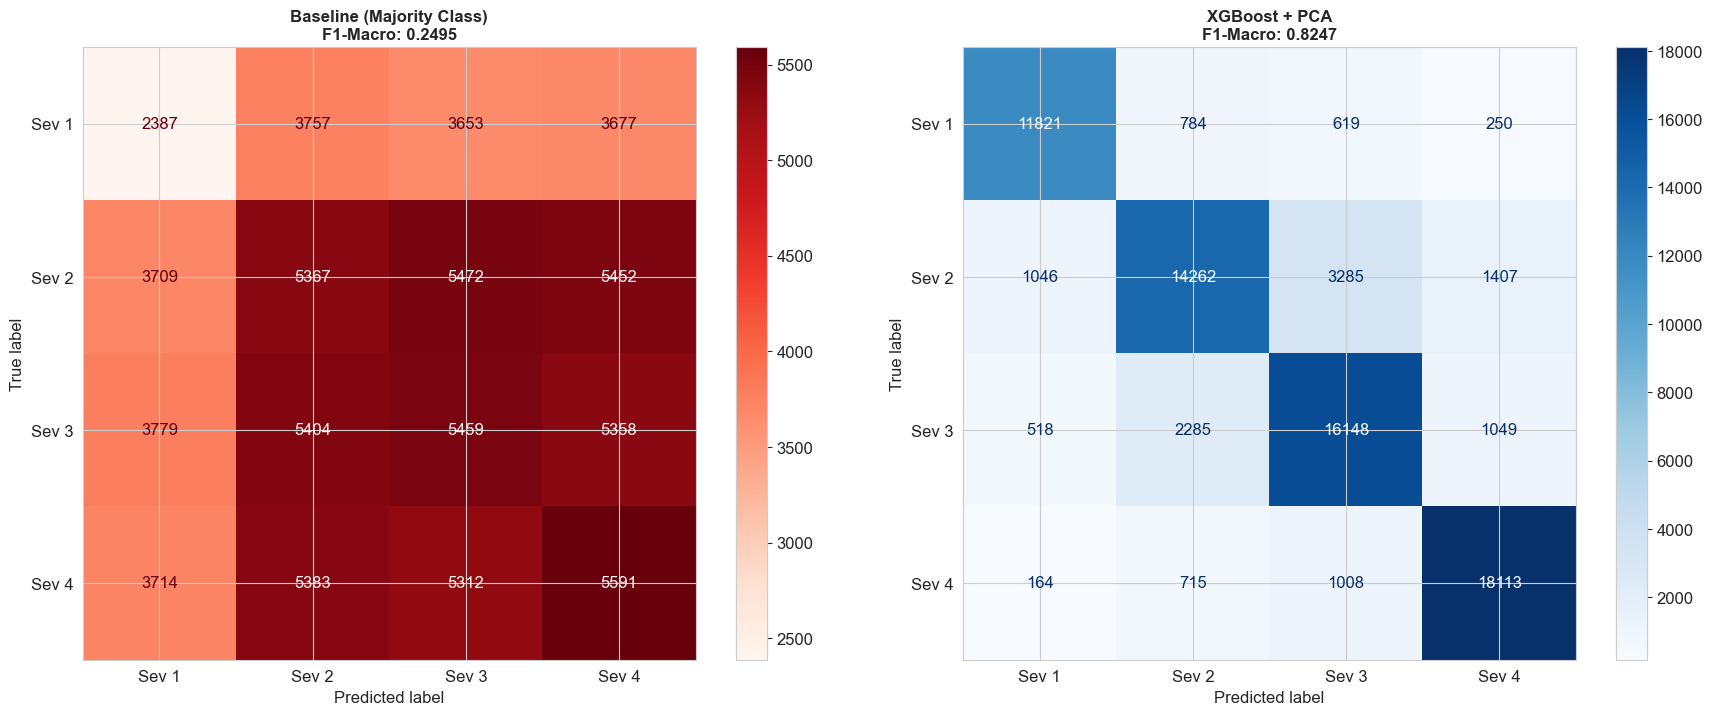

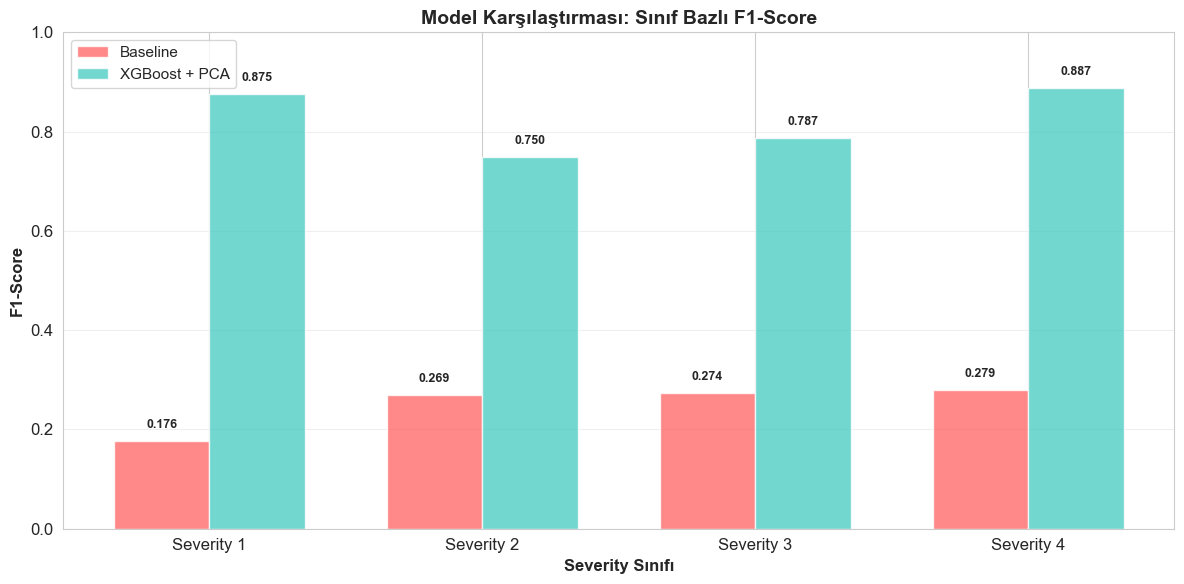


--- ROC-AUC Analizi ---


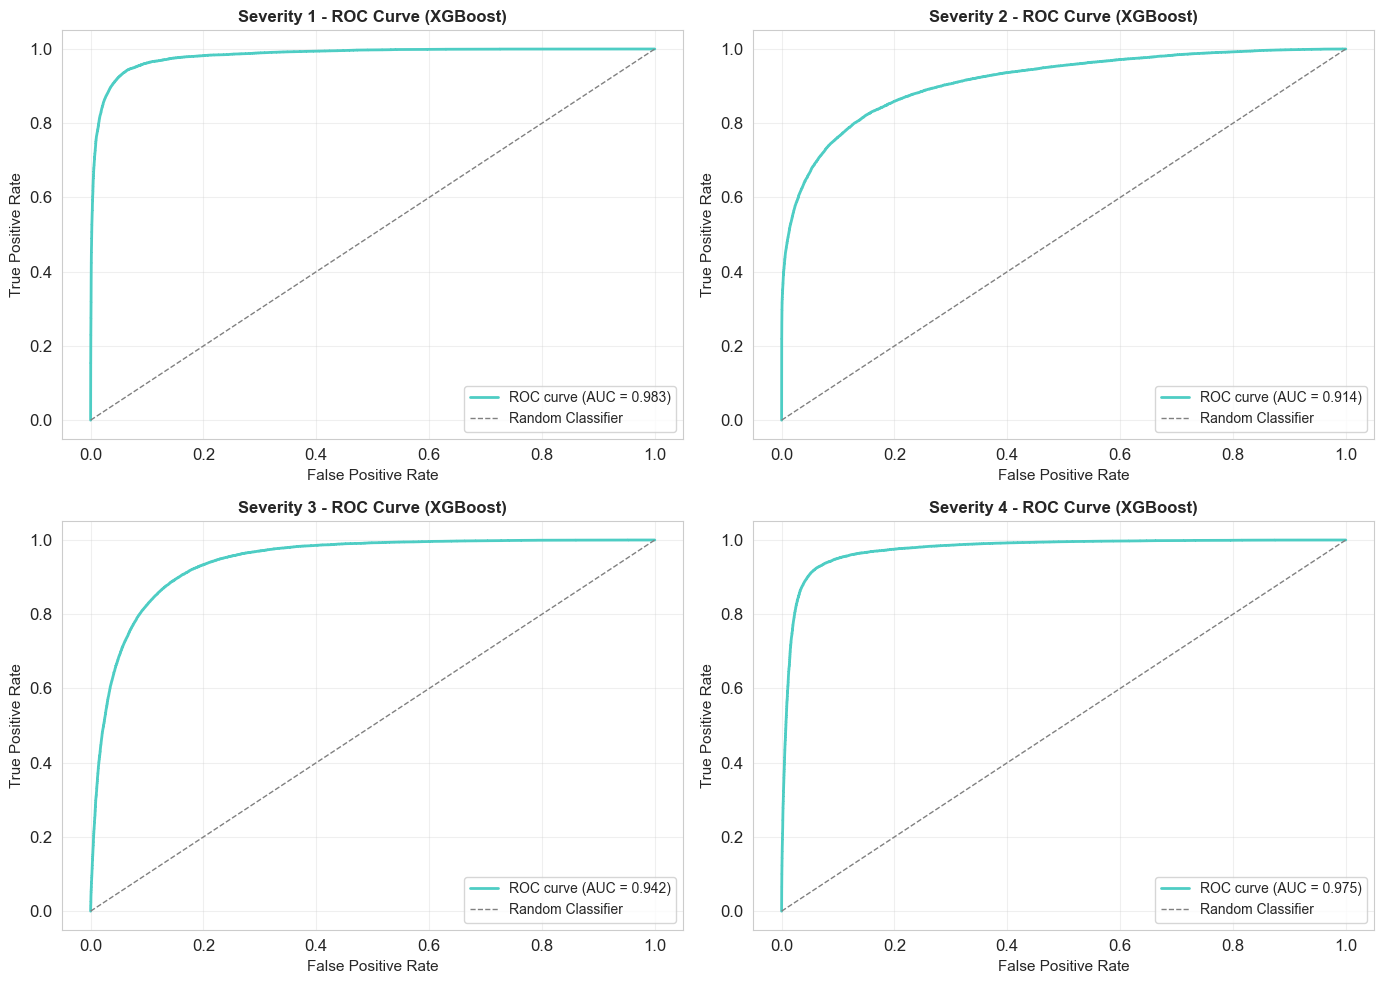


--- PCA Analizi ---


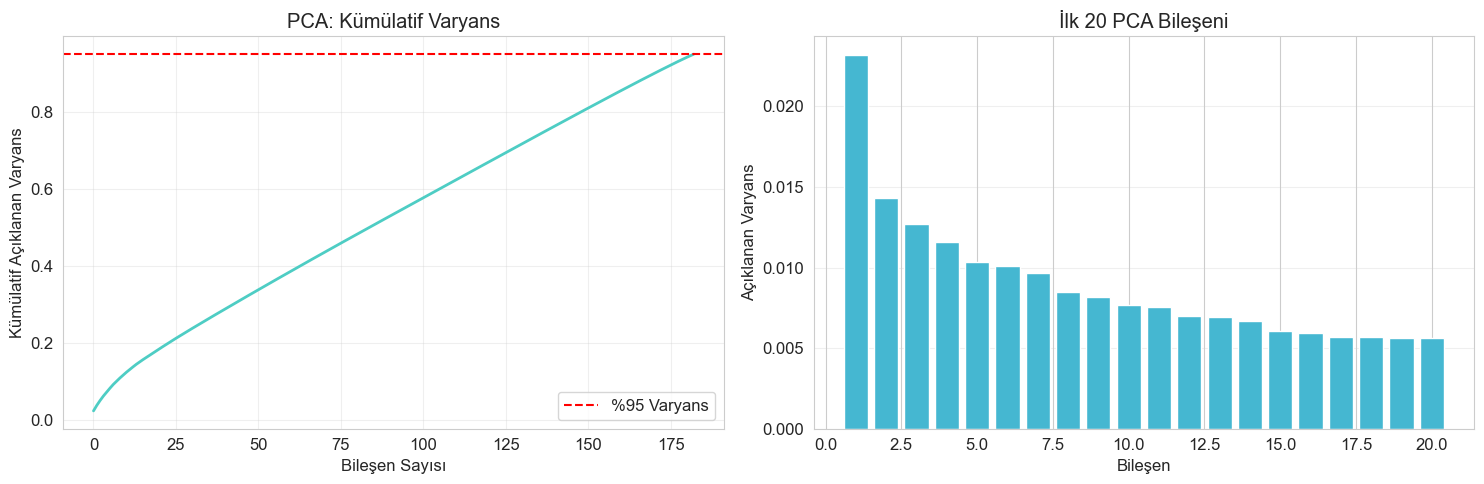


### 🎉 FİNAL ÖZET ###

 VERİ SETİ:
   - Toplam: 367,366
   - Eğitim: 293,892
   - Test: 73,474
   - Orijinal Özellikler: 214
   - PCA Bileşenleri: 183

🏆 BAŞARILI MODEL: XGBoost + PCA
   - Test F1-Macro: 0.8247
   - CV F1-Macro: 0.8182
   - Baseline Karşılaştırması: 230.52% iyileşme
   - Eğitim Süresi: 2686.77 sn

 SINIF BAZLI F1-SCORE:
   Severity 1: 0.8749
   Severity 2: 0.7497
   Severity 3: 0.7866
   Severity 4: 0.8875

  EN İYİ HİPERPARAMETRELER:
   learning_rate: 0.1
   max_depth: 10
   n_estimators: 200
   subsample: 0.8

###  TAMAMLANDI! ###


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from sklearn.metrics import (f1_score, make_scorer, classification_report, confusion_matrix, 
                             ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score)
import matplotlib.pyplot as plt
import time

#  ADIM 0: HAM VERİYİ YÜKLEME
print("--- Ham veri yükleniyor... ---")
df = pd.read_csv('usa_acc.csv')

print("\n--- Orijinal Sınıf Dağılımı ---")
print(df['Severity'].value_counts())
print("\n--- Yüzdesel Dağılım ---")
print(df['Severity'].value_counts(normalize=True))

# ADIM 1: DENGELİ ÖRNEKLEME (Stratified)
print("\n--- Adım 1: Dengeli Örnekleme Uygulanıyor ---")

sample_sizes = {
    1: 100000,
    2: 100000,
    3: 100000,
    4: 100000
}

dfs = []
for severity, size in sample_sizes.items():
    df_class = df[df['Severity'] == severity]

    if len(df_class) < size:
        print(f"  Severity {severity}: {len(df_class)} örnek (hepsi alınıyor)")
        dfs.append(df_class)
    else:
        print(f"  Severity {severity}: {size} örnek (rastgele seçildi)")
        dfs.append(df_class.sample(n=size, random_state=42))

df_sample = pd.concat(dfs, ignore_index=True)
df_sample = df_sample.sample(frac=1, random_state=42).reset_index(drop=True)

del df

print(f"\n--- Dengeli Örneklem Sonrası Toplam: {len(df_sample)} ---")
print(df_sample['Severity'].value_counts())
print("\n--- Yeni Yüzdesel Dağılım ---")
print(df_sample['Severity'].value_counts(normalize=True))

print("\n--- Veri, Eğitim ve Test Setlerine Bölünüyor ---")
X = df_sample.drop('Severity', axis=1)
y = df_sample['Severity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

# ADIM 2: FEATURE ENGINEERING
print("\n--- Adım 2: Feature Engineering Uygulanıyor ---")

def feature_engineer_final(df_input):
    df = df_input.copy()
    
    # GEREKSİZ SÜTUNLARI SİLME
    cols_to_drop = [
        'ID', 'Source', 'End_Lat', 'End_Lng', 'City', 'County', 
        'Zipcode', 'Country', 'Timezone', 'Airport_Code', 
        'Weather_Timestamp', 'Wind_Chill(F)'
    ]
    df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
    
    # ZAMANSAL ÖZELLİKLER
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
    
    df['Month'] = df['Start_Time'].dt.month
    df['Hour'] = df['Start_Time'].dt.hour
    
    df['DayOfWeek'] = df['Start_Time'].dt.day_name()
    df['Is_Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])
    df['Is_Rush_Hour'] = df['Hour'].isin([7, 8, 9, 15, 16, 17, 18])
    
    df['Duration(min)'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60
    df.loc[df['Duration(min)'] < 0, 'Duration(min)'] = 0
    df.drop(['Start_Time', 'End_Time'], axis=1, inplace=True)
    
    # YAĞIŞ ÖZELLİĞİ
    if 'Precipitation(in)' in df.columns:
        df['Precipitation(in)'].fillna(0.0, inplace=True)
        df['Was_Precipitation'] = df['Precipitation(in)'] > 0.0
        df.drop(columns=['Precipitation(in)'], inplace=True)

    # YOL TİPİ ÖZELLİĞİ
    if 'Street' in df.columns:
        df['Street'].fillna('Unknown', inplace=True)
        highway_keywords = ['Hwy', 'Fwy', 'Pkwy', 'Expy', 'Blvd', 'Highway', 'Freeway', 'Parkway', 'Expressway', 'I-', 'US-', 'SR-']
        df['Road_Type'] = df['Street'].apply(lambda x: 'Highway/Main_Road' if any(kw in str(x) for kw in highway_keywords) else 'Local_Street')
        df.drop(columns=['Street'], inplace=True)
    
    # DESCRIPTION'DAN ÖZELLİKLER
    if 'Description' in df.columns:
        desc_lower = df['Description'].str.lower().fillna('')
        df['FEAT_Is_Road_Closed'] = desc_lower.str.contains('closed|closure|alternate route', na=False)
        df['FEAT_Is_Lane_Blocked_On_Highway'] = desc_lower.str.contains('blocked|lane', na=False) & \
                                               desc_lower.str.contains('northbound|southbound|eastbound|westbound', na=False)
        df['FEAT_Is_Local_Slowdown'] = desc_lower.str.contains('traffic|slow|caution|stationary', na=False)
        df['FEAT_Is_Minor_Crash'] = desc_lower.str.contains('crash', na=False)
        df.drop(columns=['Description'], inplace=True, errors='ignore')

    # DİĞER SÜPER ÖZELLİKLER
    df['Is_Stop_and_Go_Traffic'] = (df['Is_Rush_Hour'] == True) & ((df['Traffic_Signal'] == True) | (df['Stop'] == True))
    if 'Road_Type' in df.columns:
        df['Is_High_Energy_Zone'] = (df['Road_Type'] == 'Highway/Main_Road') & (df['Junction'] == True)
    df['Is_Night_Weekend'] = (df['Is_Weekend'] == True) & (df['Hour'].isin(list(range(0, 5)) + [21, 22, 23]))

    # Winter_Night özelliği
    winter_months = [11, 12, 1]
    df['is_winter'] = df['Month'].isin(winter_months)
    night_hours = [22, 23, 0, 1, 2, 3, 4, 5]
    df['Winter_Night'] = (df['is_winter'] == True) & (df['Hour'].isin(night_hours))
    df.drop(columns=['Month'], inplace=True)
    
    return df

X_train_featured = feature_engineer_final(X_train)
X_test_featured = feature_engineer_final(X_test)
print(f"Feature engineering tamamlandı. Boyut: {X_train_featured.shape}")

# ADIM 3: AYKIRI DEĞERLER
print("\n--- Adım 3: Aykırı Değerler Temizleniyor ---")
cols_to_clip = [col for col in ['Temperature(F)', 'Wind_Speed(mph)', 'Distance(mi)', 'Duration(min)', 'Pressure(in)', 'Humidity(%)', 'Visibility(mi)'] if col in X_train_featured.columns]
for col in cols_to_clip:
    lower = X_train_featured[col].quantile(0.01)
    upper = X_train_featured[col].quantile(0.99)
    X_train_featured[col] = X_train_featured[col].clip(lower=lower, upper=upper)
    X_test_featured[col] = X_test_featured[col].clip(lower=lower, upper=upper)
print("Aykırı değer temizliği tamamlandı.")

# ADIM 4: EKSİK VERİ
print("\n--- Adım 4: Eksik Veriler Dolduruluyor ---")
fill_values = {}
for col in X_train_featured.columns:
    if X_train_featured[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(X_train_featured[col]):
            fill_values[col] = X_train_featured[col].median()
        else:
            fill_values[col] = X_train_featured[col].mode()[0]

X_train_featured.fillna(value=fill_values, inplace=True)
X_test_featured.fillna(value=fill_values, inplace=True)
print("Eksik veri doldurma tamamlandı.")

# ADIM 5: SCALER + PCA
print("\n--- Adım 5: Ölçeklendirme ve PCA Uygulanıyor ---")

# Boolean ve categorical sayısallaştırma
bool_cols = X_train_featured.select_dtypes(include='bool').columns
X_train_featured[bool_cols] = X_train_featured[bool_cols].astype(int)
X_test_featured[bool_cols] = X_test_featured[bool_cols].astype(int)

categorical_cols = X_train_featured.select_dtypes(include='object').columns.tolist()
if len(categorical_cols) > 0:
    X_train_featured = pd.get_dummies(X_train_featured, columns=categorical_cols, drop_first=True)
    X_test_featured = pd.get_dummies(X_test_featured, columns=categorical_cols, drop_first=True)
    
    missing_in_test = set(X_train_featured.columns) - set(X_test_featured.columns)
    for c in missing_in_test:
        X_test_featured[c] = 0
    X_test_featured = X_test_featured[X_train_featured.columns]

# Standardization
print("... Ölçeklendirme (StandardScaler) uygulanıyor...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_featured)
X_test_scaled = scaler.transform(X_test_featured)

# PCA
print("... PCA uygulanıyor (Varyansın %95'i korunuyor)...")
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Orijinal özellik sayısı: {X_train_featured.shape[1]}")
print(f"PCA sonrası bileşen sayısı: {X_train_pca.shape[1]}")
print(f"Açıklanan varyans: %{pca.explained_variance_ratio_.sum()*100:.2f}")

# Hedef değişkeni ayarla
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# ADIM 6: BASELINE MODEL (MAJORITY CLASS)
print("\n--- Adım 6: Baseline Model (Majority Class) ---")

baseline_model = DummyClassifier(strategy='stratified', random_state=42)
baseline_model.fit(X_train_pca, y_train_adj)
y_pred_baseline = baseline_model.predict(X_test_pca)

baseline_f1_macro = f1_score(y_test_adj, y_pred_baseline, average='macro')
baseline_f1_per_class = f1_score(y_test_adj, y_pred_baseline, average=None)

print(f" Baseline F1-Macro: {baseline_f1_macro:.4f}")
print(f"\n BASELINE SINIF BAZLI F1-SCORE:")
severity_names = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']
for name, score in zip(severity_names, baseline_f1_per_class):
    print(f"   {name}: {score:.4f}")

# ADIM 7: XGBOOST + GRIDSEARCHCV
print("\n--- Adım 7: XGBoost Model Eğitimi ve Optimizasyonu ---")

f1_scorer = make_scorer(f1_score, average='macro')

pipeline_params = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(
    random_state=42,
    objective='multi:softmax',
    num_class=4,
    eval_metric='mlogloss',
    n_jobs=-1
)

grid_search = GridSearchCV(
    xgb_model,
    pipeline_params,
    cv=3,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=2
)

print(f"Toplam kombinasyon: {np.prod([len(v) for v in pipeline_params.values()])}\n")

start_time = time.time()
grid_search.fit(X_train_pca, y_train_adj)
end_time = time.time()

print(f"\n Eğitim tamamlandı! Süre: {end_time - start_time:.2f} saniye")

# ADIM 8: TEST SETİ DEĞERLENDİRMESİ
print("\n--- Adım 8: Test Seti Değerlendirmesi ---")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
y_pred_proba = best_model.predict_proba(X_test_pca)

test_f1_macro = f1_score(y_test_adj, y_pred, average='macro')
test_f1_per_class = f1_score(y_test_adj, y_pred, average=None)

print(f"\n CV F1-Macro: {grid_search.best_score_:.4f}")
print(f" Test F1-Macro: {test_f1_macro:.4f}")

print(f"\n SINIF BAZLI F1-SCORE:")
for name, score in zip(severity_names, test_f1_per_class):
    print(f"   {name}: {score:.4f}")

print(f"\n  EN İYİ HİPERPARAMETRELER:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")

# ADIM 9: MODEL KARŞILAŞTIRMASI
print("\n--- Adım 9: Model Karşılaştırması ---")

improvement = ((test_f1_macro - baseline_f1_macro) / baseline_f1_macro * 100) if baseline_f1_macro > 0 else 0
print(f"\n PERFORMANS KARŞILAŞTIRMASI:")
print(f"   Baseline F1-Macro: {baseline_f1_macro:.4f}")
print(f"   XGBoost F1-Macro: {test_f1_macro:.4f}")
print(f"   İyileşme: {improvement:.2f}%")

# ADIM 10: DETAYLI RAPOR
print("\n--- Classification Report ---")
print(classification_report(y_test_adj, y_pred, target_names=severity_names))

# Confusion Matrix Karşılaştırması
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Baseline CM
cm_baseline = confusion_matrix(y_test_adj, y_pred_baseline)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=['Sev 1', 'Sev 2', 'Sev 3', 'Sev 4'])
disp1.plot(cmap=plt.cm.Reds, ax=axes[0])
axes[0].set_title(f'Baseline (Majority Class)\nF1-Macro: {baseline_f1_macro:.4f}', fontsize=12, fontweight='bold')

# XGBoost CM
cm = confusion_matrix(y_test_adj, y_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sev 1', 'Sev 2', 'Sev 3', 'Sev 4'])
disp2.plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title(f'XGBoost + PCA\nF1-Macro: {test_f1_macro:.4f}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Sınıf Bazlı F1-Score Karşılaştırması
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(severity_names))
width = 0.35

bars1 = ax.bar(x - width/2, baseline_f1_per_class, width, label='Baseline', alpha=0.8, color='#FF6B6B')
bars2 = ax.bar(x + width/2, test_f1_per_class, width, label='XGBoost + PCA', alpha=0.8, color='#4ECDC4')

ax.set_xlabel('Severity Sınıfı', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax.set_title('Model Karşılaştırması: Sınıf Bazlı F1-Score', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(severity_names)
ax.legend(fontsize=11)
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}',
                ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# ADIM 11: ROC-AUC (One-vs-Rest)
print("\n--- ROC-AUC Analizi ---")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, name in enumerate(severity_names):
    y_test_binary = (y_test_adj == i).astype(int)
    y_score = y_pred_proba[:, i]
    
    fpr, tpr, _ = roc_curve(y_test_binary, y_score)
    roc_auc = auc(fpr, tpr)
    
    axes[i].plot(fpr, tpr, color='#4ECDC4', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    axes[i].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
    axes[i].set_xlabel('False Positive Rate', fontsize=11)
    axes[i].set_ylabel('True Positive Rate', fontsize=11)
    axes[i].set_title(f'{name} - ROC Curve (XGBoost)', fontsize=12, fontweight='bold')
    axes[i].legend(fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ADIM 12: PCA ANALİZİ
print("\n--- PCA Analizi ---")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2, color='#4ECDC4')
axes[0].set_xlabel('Bileşen Sayısı')
axes[0].set_ylabel('Kümülatif Açıklanan Varyans')
axes[0].set_title('PCA: Kümülatif Varyans')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0.95, color='red', linestyle='--', label='%95 Varyans')
axes[0].legend()

n_show = min(20, len(pca.explained_variance_ratio_))
axes[1].bar(range(1, n_show+1), pca.explained_variance_ratio_[:n_show], color='#45B7D1')
axes[1].set_xlabel('Bileşen')
axes[1].set_ylabel('Açıklanan Varyans')
axes[1].set_title(f'İlk {n_show} PCA Bileşeni')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# FİNAL ÖZET
print("\n" + "="*100)
print("### 🎉 FİNAL ÖZET ###")
print("="*100)
print(f"\n VERİ SETİ:")
print(f"   - Toplam: {len(df_sample):,}")
print(f"   - Eğitim: {len(X_train):,}")
print(f"   - Test: {len(X_test):,}")
print(f"   - Orijinal Özellikler: {X_train_featured.shape[1]}")
print(f"   - PCA Bileşenleri: {X_train_pca.shape[1]}")

print(f"\n🏆 BAŞARILI MODEL: XGBoost + PCA")
print(f"   - Test F1-Macro: {test_f1_macro:.4f}")
print(f"   - CV F1-Macro: {grid_search.best_score_:.4f}")
print(f"   - Baseline Karşılaştırması: {improvement:.2f}% iyileşme")
print(f"   - Eğitim Süresi: {end_time - start_time:.2f} sn")

print(f"\n SINIF BAZLI F1-SCORE:")
for name, score in zip(severity_names, test_f1_per_class):
    print(f"   {name}: {score:.4f}")

print(f"\n  EN İYİ HİPERPARAMETRELER:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")

print("\n" + "="*100)
print("###  TAMAMLANDI! ###")
print("="*100)